<a href="https://colab.research.google.com/github/JorgeCastroM/DATASCIENCE/blob/main/Caso_Practico_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Exploratorio de Datos (EDA) - Conjunto de Datos sobre Abandono de Clientes Bancarios**

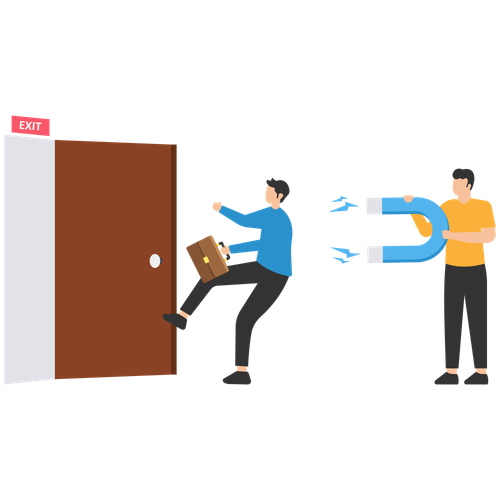

# **Definición del problema**
En este proyecto, el objetivo es predecir la probabilidad de que un cliente abandone o permanezca en el banco. Este fenómeno se conoce como Churn o abandono de clientes, un problema recurrente en la industria bancaria y otras áreas de servicios. El churn puede tener un impacto financiero significativo en las instituciones, ya que es más costoso adquirir nuevos clientes que retener a los actuales. La predicción de abandono permite a los bancos aplicar estrategias proactivas para retener a los clientes con mayor riesgo de abandono.

### **Pregunta clave:**

### **¿Qué factores determinan que un cliente abandone el banco y cómo podemos predecirlo utilizando los datos disponibles?**

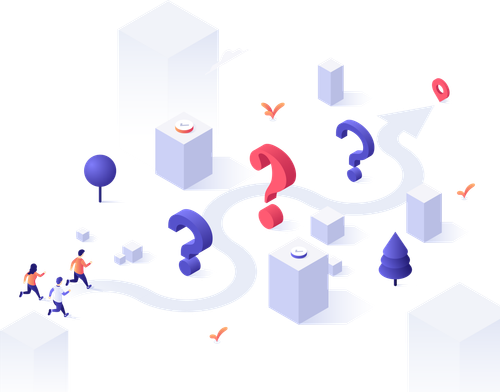

# **Descripción de la situación y datos necesarios**
El banco ha recopilado un conjunto de datos de clientes que contiene información tanto demográfica como transaccional. Este dataset incluye características como la edad, el género, el nivel de educación, el estado civil, el límite de crédito, la cantidad de productos bancarios que posee el cliente, y otras variables relacionadas con su actividad bancaria (como el número de transacciones realizadas o el tiempo que ha sido cliente del banco).

El banco enfrenta un problema de pérdida de clientes (churn), y desea identificar los factores que más influyen en esta decisión. Para abordar este problema, necesitamos analizar diferentes aspectos de los clientes, tales como:

* **Demografía:** Edad, género, nivel de educación, ingresos, estado civil.
* **Relación con el banco:** Meses que ha sido cliente, productos que posee, límites de crédito.
* **Comportamiento bancario:** Número de transacciones, cantidad de contactos con el banco, períodos de inactividad.

Además, la variable objetivo que vamos a predecir es si el cliente es un Cliente Perdido o Cliente Existente.

# **Explorar y entender los datos para resolver el problema**
Antes de poder realizar cualquier predicción, necesitamos explorar y entender los datos en detalle. Esto incluye:

* **Exploración inicial de los datos (EDA):**
1. Distribución de las variables: Queremos observar cómo están distribuidas las variables numéricas (como la edad y el límite de crédito) y categóricas (como el género y el nivel educativo) para comprender las características de los clientes.
2. Valores faltantes: Debemos asegurarnos de que los datos sean completos, identificando y gestionando los posibles valores nulos o inconsistencias.
3. Detección de outliers: Los valores atípicos en variables clave (por ejemplo, límites de crédito extremadamente altos) pueden afectar negativamente el análisis, por lo que debemos identificarlos y decidir cómo manejarlos.
* **Análisis de correlaciones:**

Debemos identificar cómo las variables se relacionan entre sí. Por ejemplo, ¿hay una fuerte correlación entre el límite de crédito y el número de productos bancarios que tiene el cliente? ¿Los clientes con mayor tiempo de inactividad tienen más probabilidades de abandonar el banco?
Analizar cómo las variables categóricas influyen en la probabilidad de que un cliente abandone el banco. Por ejemplo, ¿ciertos grupos demográficos tienen una mayor probabilidad de abandonar? ¿El comportamiento transaccional (por ejemplo, menos transacciones) está relacionado con el abandono?

* **Preparación de los datos para modelado:**

Una vez que hayamos entendido bien los datos y manejado cualquier problema de calidad, necesitamos preparar los datos para el análisis predictivo. Esto incluye transformar las variables categóricas en variables numéricas, normalizar o estandarizar los datos y dividir el dataset en conjunto de entrenamiento y prueba.

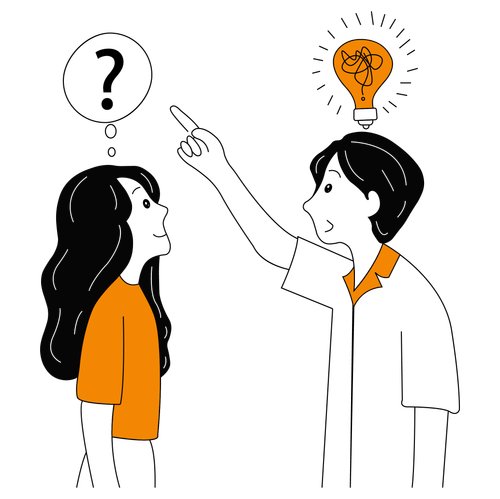

## **Descripción del dataset**

El dataset que utilizaremos se llama **abandono_banco** y contiene información sobre más de 10,000 clientes de un banco. Cada fila representa a un cliente, y las columnas describen características demográficas y financieras de los clientes. A continuación, se presenta una descripción de las principales columnas del dataset:



1. **Numero Cliente:** Un identificador único para cada cliente. Esta columna no aporta información para el análisis predictivo.
2. **Estado Abandono:** Indica si el cliente sigue siendo un cliente activo ("Cliente Existente") o si ha abandonado el banco ("Cliente Perdido"). Esta columna será nuestra variable objetivo.
3. **Edad Cliente:** La edad del cliente.
4. **Genero:** Género del cliente ("M" para masculino, "F" para femenino).
5. **Cant. Personas a Cargo:** Número de personas dependientes que tiene el cliente.
6. **Nivel Educativo:** Nivel de educación del cliente (por ejemplo, "Secundaria", "Graduado").
7. **Estado Civil:** Estado civil del cliente (por ejemplo, "Soltero", "Casado").
8. **Rango Ingresos:** Categoría de ingresos del cliente (por ejemplo, "$60K - $80K").
9. **Categoria Tarjeta:** Tipo de tarjeta de crédito que posee el cliente (por ejemplo, "Azul", "Oro").
10. **Antiguedad Cuenta:** Cantidad de meses que el cliente ha tenido una cuenta con el banco.
11. **Total Productos Bancarios:** Número total de productos que el cliente tiene con el banco (como cuentas, tarjetas, préstamos).
12. **Meses Inactivos Ultimo Año:** Número de meses que el cliente ha estado inactivo en los últimos 12 meses.
13. **Frecuencia de Contacto al Banco:** Número de veces que el cliente ha contactado al banco en los últimos 12 meses.
14. **Limite Credito:** Límite de crédito del cliente.
15. **Saldo Pendiente Tarjeta:** Saldo rotativo total en la tarjeta de crédito.
16. **Promedio Credito Disponible:** Promedio de crédito disponible.
17. **Cambio Monto Q4 Q1:** Cambio en el monto total de transacciones entre el cuarto trimestre y el primero.
18. **Monto Total Transacciones:** Monto total de transacciones realizadas por el cliente.
19. **Numero Total Transacciones:** Número total de transacciones realizadas.
20. **Cambio Numero Transacciones Q4 Q1:** Cambio en el número total de transacciones entre el cuarto trimestre y el primero.
21. **Porcentaje Uso Credito:** Indica de manera más clara que se trata del porcentaje del crédito disponible que el cliente ha utilizado.





# 📥 **Importar Librerías**

In [ ]:
import numpy as np  # álgebra lineal, operaciones matemáticas y manipulación de arreglos.
import pandas as pd  # procesamiento de datos, manejo de archivos CSV (por ejemplo, pd.read_csv).
from matplotlib import pyplot as plt  # visualización de los datos mediante gráficos.
import seaborn as sns  # creación de gráficos estadísticos avanzados y atractivos.
import plotly.express as px  # gráficos interactivos y visualizaciones avanzadas.
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from scipy import stats
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# ✅ **Cargar el Conjunto de Datos**

In [ ]:
url = "https://raw.githubusercontent.com/emadrigals104/PLFPython/main/Datasets/abandono_banco.csv"

df = pd.read_csv(url,sep=',',header=0)

# Mostrar las primeras 5 filas del dataset
df.head()

Numero Cliente    Estado Abandono  Edad Cliente     Genero  \
0       768805383  Cliente Existente          45.0  Masculino   
1       818770008  Cliente Existente          49.0   Femenino   
2       713982108  Cliente Existente          51.0  Masculino   
3       769911858  Cliente Existente          40.0   Femenino   
4       709106358  Cliente Existente           NaN  Masculino   

   Cant. Personas a Cargo Nivel Educativo Estado Civil Rango Ingresos  \
0                       3      Secundaria       Casado    $60K - $80K   
1                       5        Graduado      Soltero  Menos de $40K   
2                       3        Graduado       Casado   $80K - $120K   
3                       4      Secundaria  Desconocido  Menos de $40K   
4                       3   Sin Educación       Casado    $60K - $80K   

  Categoria Tarjeta  Antiguedad Cuenta  ...  Meses Inactivos Ultimo Año  \
0              Azul                 39  ...                           1   
1              Azul                 44  ...                           1   
2              Azul                 36  ...                           1   
3              Azul                 34  ...                           4   
4              Azul                 21  ...                           1   

   Frecuencia de Contacto al Banco  Limite Credito  Saldo Pendiente Tarjeta  \
0                                3         12691.0                      777   
1                                2          8256.0                      864   
2                                0          3418.0                        0   
3                                1          3313.0                     2517   
4                                0          4716.0                        0   

   Promedio Credito Disponible  Cambio Monto Q4 Q1  Monto Total Transacciones  \
0                      11914.0               1.335                       1144   
1                       7392.0               1.541                       1291   
2                       3418.0               2.594                       1887   
3                        796.0               1.405                       1171   
4                       4716.0               2.175                        816   

   Numero Total Transacciones  Cambio Numero Transacciones Q4 Q1  \
0                          42                              1.625   
1                          33                              3.714   
2                          20                              2.333   
3                          20                              2.333   
4                          28                              2.500   

   Porcentaje Uso Credito  
0                   0.061  
1                   0.105  
2                   0.000  
3                   0.760  
4                   0.000  

[5 rows x 21 columns]

In [ ]:
prueba = df.sample(30)

In [ ]:
prueba.drop(columns=['Estado Abandono'],axis=1,inplace=True)

# 📑 **Información General del Conjunto de Datos**

**`df.info():`**Este comando nos proporciona la siguiente información:
* Número total de entradas (filas) en el dataset.
* Número de columnas y sus respectivos nombres.
* Tipo de dato de cada columna (por ejemplo, int64, float64, object).
* Valores no nulos en cada columna (si alguna columna tiene valores nulos, este método lo indicará).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Numero Cliente                     10132 non-null  int64  
 1   Estado Abandono                    10132 non-null  object 
 2   Edad Cliente                       7736 non-null   float64
 3   Genero                             10132 non-null  object 
 4   Cant. Personas a Cargo             10132 non-null  int64  
 5   Nivel Educativo                    10132 non-null  object 
 6   Estado Civil                       9116 non-null   object 
 7   Rango Ingresos                     10132 non-null  object 
 8   Categoria Tarjeta                  10124 non-null  object 
 9   Antiguedad Cuenta                  10132 non-null  int64  
 10  Total Productos Bancarios          10132 non-null  int64  
 11  Meses Inactivos Ultimo Año         10132 non-null  int





**`df.shape:`** Nos indica el tamaño del dataset, es decir, cuántas filas y columnas tiene.


In [ ]:
df.shape

(10132, 21)

**`df.columns:`** Devuelve los nombres de las columnas del dataset.

In [ ]:
df.columns

Index(['Numero Cliente', 'Estado Abandono', 'Edad Cliente', 'Genero',
       'Cant. Personas a Cargo', 'Nivel Educativo', 'Estado Civil',
       'Rango Ingresos', 'Categoria Tarjeta', 'Antiguedad Cuenta',
       'Total Productos Bancarios', 'Meses Inactivos Ultimo Año',
       'Frecuencia de Contacto al Banco', 'Limite Credito',
       'Saldo Pendiente Tarjeta', 'Promedio Credito Disponible',
       'Cambio Monto Q4 Q1', 'Monto Total Transacciones',
       'Numero Total Transacciones', 'Cambio Numero Transacciones Q4 Q1',
       'Porcentaje Uso Credito'],
      dtype='object')

Para eliminar una columna, usamos el método `drop()`, que nos permite especificar qué columna o columnas eliminar, y si queremos hacerlo en el lugar `(inplace=True)` o devolver un nuevo DataFrame sin esa columna.

In [ ]:
df.drop(['Numero Cliente','Cambio Numero Transacciones Q4 Q1','Cambio Monto Q4 Q1'],axis=1, inplace=True)

**`unique()`** es una función que se utiliza para obtener los valores únicos de una columna en un DataFrame. Cuando aplicamos esta función a una columna, devuelve una lista de todos los valores distintos presentes en esa columna, eliminando duplicados.

In [ ]:
# Columnas categóricas
columnas_categoricas = ['Estado Abandono', 'Genero', 'Nivel Educativo', 'Estado Civil', 'Rango Ingresos', 'Categoria Tarjeta']

# Mostrar los valores únicos para cada columna categórica
for columna in columnas_categoricas:
    print(f"Valores únicos de {columna}:")
    print(df[columna].unique())
    print("\n")

Valores únicos de Estado Abandono:
['Cliente Existente' 'Cliente Perdido']


Valores únicos de Genero:
['Masculino' 'Femenino']


Valores únicos de Nivel Educativo:
['Secundaria' 'Graduado' 'Sin Educación' 'Desconocido' 'Universidad'
 'Postgrado' 'Doctorado']


Valores únicos de Estado Civil:
['Casado' 'Soltero' 'Desconocido' nan 'Divorciado']


Valores únicos de Rango Ingresos:
['$60K - $80K' 'Menos de $40K' '$80K - $120K' '$40K - $60K' 'Mas de $120K'
 'Desconocido']


Valores únicos de Categoria Tarjeta:
['Azul' 'Oro' 'Plata' nan 'Platino']




# **Estadística Básica**
La estadística básica nos ayuda a comprender mejor los datos mediante medidas clave como la media, la mediana, la desviación estándar, y otras estadísticas descriptivas.

Estas métricas proporcionan una visión general de la distribución de los datos, lo que es crucial para entender los patrones y tendencias antes de aplicar modelos más complejos.

Podemos obtener todas estas estadísticas de una sola vez utilizando el método `describe()`, que devuelve un resumen de las métricas más importantes para cada columna numérica.

¿Qué nos da `describe()`?
* count: Número de observaciones no nulas.
* mean: Media (promedio).
* std: Desviación estándar.
* min: Valor mínimo.
* 25%: Primer cuartil (Q1).
* 50%: Mediana (Q2).
* 75%: Tercer cuartil (Q3).
* max: Valor máximo.

In [ ]:
df.describe()

Edad Cliente  Cant. Personas a Cargo  Antiguedad Cuenta  \
count   7736.000000            10132.000000       10132.000000   
mean      46.298345                2.345934          35.927063   
std        8.010670                1.298675           7.986126   
min       26.000000                0.000000          13.000000   
25%       41.000000                1.000000          31.000000   
50%       46.000000                2.000000          36.000000   
75%       52.000000                3.000000          40.000000   
max       73.000000                5.000000          56.000000   

       Total Productos Bancarios  Meses Inactivos Ultimo Año  \
count               10132.000000                10132.000000   
mean                    3.812969                    2.341196   
std                     1.554351                    1.010432   
min                     1.000000                    0.000000   
25%                     3.000000                    2.000000   
50%                     4.000000                    2.000000   
75%                     5.000000                    3.000000   
max                     6.000000                    6.000000   

       Frecuencia de Contacto al Banco  Limite Credito  \
count                     10132.000000    10132.000000   
mean                          2.455784     8631.685363   
std                           1.106205     9087.334559   
min                           0.000000     1438.300000   
25%                           2.000000     2555.000000   
50%                           2.000000     4549.000000   
75%                           3.000000    11067.250000   
max                           6.000000    34516.000000   

       Saldo Pendiente Tarjeta  Promedio Credito Disponible  \
count             10132.000000                 10132.000000   
mean               1163.136794                  7468.548569   
std                 814.978044                  9089.318891   
min                   0.000000                     3.000000   
25%                 373.000000                  1325.000000   
50%                1277.000000                  3473.000000   
75%                1784.000000                  9858.000000   
max                2517.000000                 34516.000000   

       Monto Total Transacciones  Numero Total Transacciones  \
count               10132.000000                10132.000000   
mean                 4407.914923                   64.869029   
std                  3401.616666                   23.477048   
min                   510.000000                   10.000000   
25%                  2156.000000                   45.000000   
50%                  3901.000000                   67.000000   
75%                  4742.000000                   81.000000   
max                 18484.000000                  139.000000   

       Porcentaje Uso Credito  
count            10132.000000  
mean                 0.274924  
std                  0.275660  
min                  0.000000  
25%                  0.023000  
50%                  0.176000  
75%                  0.503000  
max                  0.999000

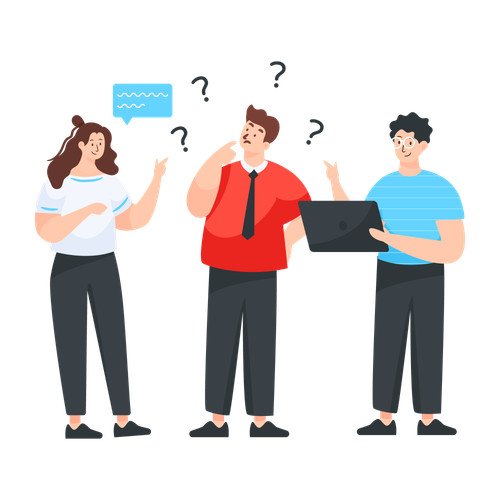

# **5 Preguntas que todo Cientifico de Datos debe responder en un Proyecto**

# **1. ¿Qué tan confiables y completos son los datos que tenemos?**
*	**Propósito:** Esta pregunta busca entender la calidad general del dataset. Aquí no solo estamos evaluando si faltan valores (valores nulos), sino también si los datos son consistentes, si tienen duplicados, si están en el formato correcto o si presentan anomalías. La calidad de los datos es un paso crucial, ya que cualquier problema en esta etapa podría afectar negativamente los análisis y las conclusiones.
* **¿Por qué es importante?:** Porque necesitamos garantizar que los datos son correctos, completos y consistentes antes de profundizar en el análisis. Si hay problemas de calidad, debemos corregirlos para evitar errores futuros en las predicciones o en el análisis.
*	**Preguntas relacionadas:**
1. ¿Existen valores nulos o faltantes? ¿Cuáles son las columnas con más valores nulos?
2. 	¿Hay valores duplicados o inconsistentes en las columnas? ¿Deberían eliminarse o corregirse?
*	**Acciones en el EDA:**
1.	Revisión de valores nulos, duplicados y la consistencia de los tipos de datos.
2.	Gráfico para ver la distribución de valores nulos o faltantes.
3.	Uso de funciones como isnull() y duplicated() para evaluar la calidad de los datos.


## **Valores Vacíos (Nulos) en el Dataset**
Cuando analizamos un dataset, es fundamental asegurarnos de que no tengamos valores faltantes o nulos en las columnas, ya que estos pueden afectar el análisis y la calidad de los modelos predictivos. En esta sección, te explicaré cómo encontrar y manejar estos valores en tu dataset.

**¿Qué es un valor vacío (nulo)?**

Un valor nulo o vacío es un valor ausente o faltante en el dataset. Puede ocurrir por diversos motivos, como errores al recolectar los datos o problemas en la integración de sistemas. Estos valores deben ser manejados adecuadamente para evitar errores en el análisis o modelos.

In [ ]:
def valores_nulos(df):
    total = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)

    return pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])


valores_nulos(df)

Total  Porcentaje
Edad Cliente                      2396   23.647848
Estado Civil                      1016   10.027635
Categoria Tarjeta                    8    0.078958
Estado Abandono                      0    0.000000
Frecuencia de Contacto al Banco      0    0.000000
Numero Total Transacciones           0    0.000000
Monto Total Transacciones            0    0.000000
Promedio Credito Disponible          0    0.000000
Saldo Pendiente Tarjeta              0    0.000000
Limite Credito                       0    0.000000
Total Productos Bancarios            0    0.000000
Meses Inactivos Ultimo Año           0    0.000000
Antiguedad Cuenta                    0    0.000000
Rango Ingresos                       0    0.000000
Nivel Educativo                      0    0.000000
Cant. Personas a Cargo               0    0.000000
Genero                               0    0.000000
Porcentaje Uso Credito               0    0.000000

<Figure size 1200x600 with 0 Axes>

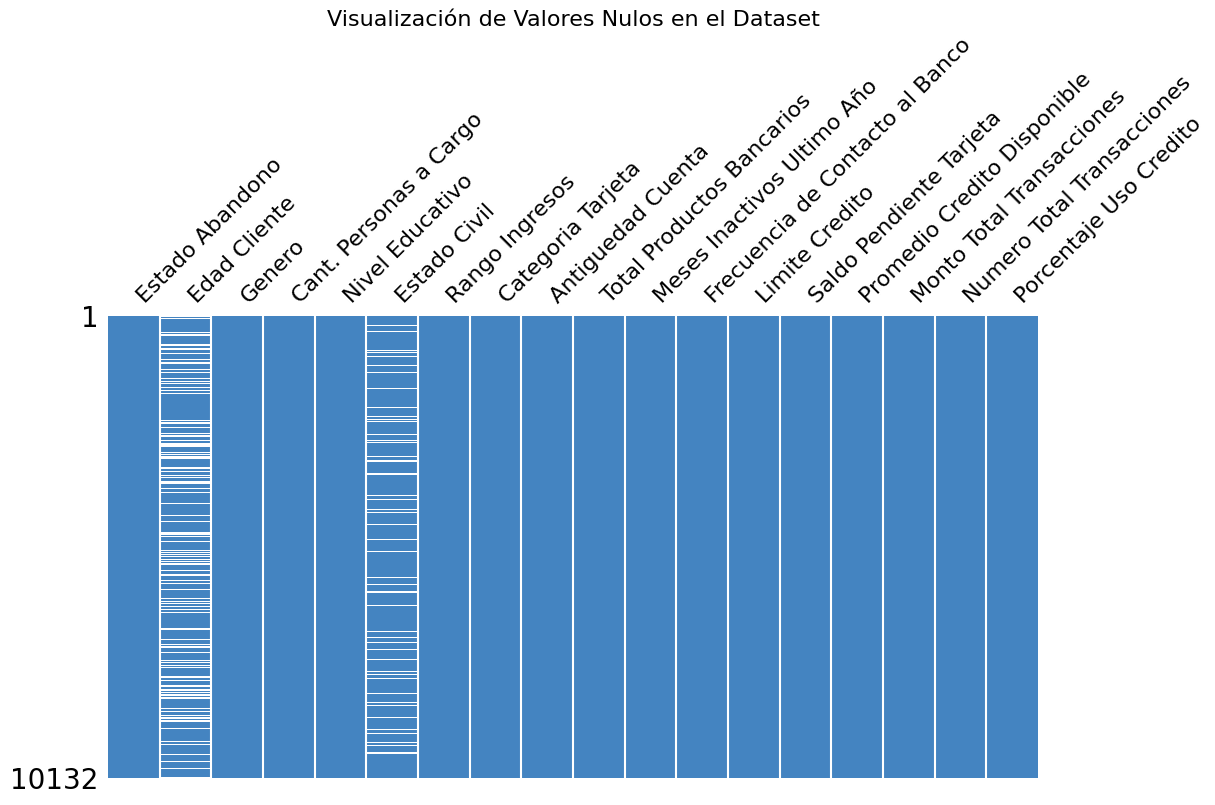

In [ ]:
# Visualizar los valores nulos
plt.figure(figsize=(12,6))
msno.matrix(df, figsize=(12,6), sparkline=False, color=(0.27, 0.52, 0.76))
plt.title('Visualización de Valores Nulos en el Dataset', fontsize=16)
plt.grid(False)
plt.show()
#Mas pequeños los textos

## **Estrategias para Manejar Valores Nulos:**
**Para columnas numéricas:**

* **Rellenar con la media o mediana:** Puedes imputar los valores nulos con la media o la mediana de la columna, lo que es útil cuando los datos son simétricos o tienen una distribución sesgada.
* **Eliminar filas:** Si los valores nulos son pocos y no deseas rellenarlos, puedes eliminar las filas que contengan valores nulos.

In [ ]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Rellenar los valores nulos en columnas numéricas con la mediana
for columna in columnas_numericas:
    df[columna] = df[columna].fillna(df[columna].median())

**Para columnas categóricas:**

* **Rellenar con la moda:** Imputar con la moda (el valor más frecuente) es una opción útil para columnas categóricas.
* **Crear una nueva categoría:** En algunos casos, puedes imputar los valores nulos con una nueva categoría, como "Desconocido" o "No especificado", dependiendo del contexto del análisis.

In [ ]:
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# Rellenar los valores nulos en columnas categóricas con la moda
for columna in columnas_categoricas:
    df[columna] = df[columna].fillna(df[columna].mode()[0])

**Alternativas:**

**Eliminar filas con valores nulos:**

In [ ]:
df.dropna(inplace=True)

**Imputar columnas categóricas con una nueva categoría:**



In [ ]:
df['Estado Civil'] = df['Estado Civil'].fillna('Desconocido')

## **Encontrar Registros Duplicados**
Cuando trabajamos con datasets grandes, es importante asegurarse de que no haya registros duplicados, ya que estos pueden distorsionar el análisis y llevar a conclusiones incorrectas. Encontrar y manejar los registros duplicados es una práctica fundamental en la limpieza de datos.

**¿Qué es un registro duplicado?**

Un registro duplicado es una fila que tiene exactamente los mismos valores en todas sus columnas que otra fila del dataset. Estos registros pueden ser el resultado de errores en la captura o integración de datos.

**`df.duplicated():`**Esta función nos permite identificar si un registro es duplicado o no.

In [ ]:
df[df.duplicated()]

Estado Abandono  Edad Cliente     Genero  Cant. Personas a Cargo  \
10127    Cliente Perdido          50.0  Masculino                       1   
10128    Cliente Perdido          41.0  Masculino                       2   
10129  Cliente Existente          57.0  Masculino                       2   
10130    Cliente Perdido          41.0  Masculino                       2   
10131  Cliente Existente          46.0  Masculino                       2   

      Nivel Educativo Estado Civil Rango Ingresos Categoria Tarjeta  \
10127     Desconocido       Casado   $80K - $120K              Azul   
10128     Desconocido   Divorciado    $40K - $60K              Azul   
10129        Graduado       Casado   $80K - $120K              Azul   
10130     Desconocido   Divorciado    $40K - $60K              Azul   
10131        Graduado      Soltero    $40K - $60K              Azul   

       Antiguedad Cuenta  Total Productos Bancarios  \
10127                 36                          6   
10128                 25                          4   
10129                 40                          6   
10130                 25                          4   
10131                 40                          3   

       Meses Inactivos Ultimo Año  Frecuencia de Contacto al Banco  \
10127                           3                                4   
10128                           2                                3   
10129                           3                                4   
10130                           2                                3   
10131                           2                                3   

       Limite Credito  Saldo Pendiente Tarjeta  Promedio Credito Disponible  \
10127          9959.0                      952                       9007.0   
10128          4277.0                     2186                       2091.0   
10129         17925.0                     1909                      16016.0   
10130          4277.0                     2186                       2091.0   
10131          4003.0                     1851                       2152.0   

       Monto Total Transacciones  Numero Total Transacciones  \
10127                      10310                          63   
10128                       8764                          69   
10129                      17498                         111   
10130                       8764                          69   
10131                      15476                         117   

       Porcentaje Uso Credito  
10127                   0.096  
10128                   0.511  
10129                   0.106  
10130                   0.511  
10131                   0.462

Para eliminar duplicados en un DataFrame de Pandas, puedes utilizar el método `drop_duplicates()`, que elimina las filas duplicadas. Por defecto, se eliminan las filas duplicadas completas, pero también puedes especificar ciertas columnas si solo te interesa eliminar duplicados con base en algunas de ellas.

In [ ]:
df = df.drop_duplicates()
df.head()

Estado Abandono  Edad Cliente     Genero  Cant. Personas a Cargo  \
0  Cliente Existente          45.0  Masculino                       3   
1  Cliente Existente          49.0   Femenino                       5   
2  Cliente Existente          51.0  Masculino                       3   
3  Cliente Existente          40.0   Femenino                       4   
4  Cliente Existente          46.0  Masculino                       3   

  Nivel Educativo Estado Civil Rango Ingresos Categoria Tarjeta  \
0      Secundaria       Casado    $60K - $80K              Azul   
1        Graduado      Soltero  Menos de $40K              Azul   
2        Graduado       Casado   $80K - $120K              Azul   
3      Secundaria  Desconocido  Menos de $40K              Azul   
4   Sin Educación       Casado    $60K - $80K              Azul   

   Antiguedad Cuenta  Total Productos Bancarios  Meses Inactivos Ultimo Año  \
0                 39                          5                           1   
1                 44                          6                           1   
2                 36                          4                           1   
3                 34                          3                           4   
4                 21                          5                           1   

   Frecuencia de Contacto al Banco  Limite Credito  Saldo Pendiente Tarjeta  \
0                                3         12691.0                      777   
1                                2          8256.0                      864   
2                                0          3418.0                        0   
3                                1          3313.0                     2517   
4                                0          4716.0                        0   

   Promedio Credito Disponible  Monto Total Transacciones  \
0                      11914.0                       1144   
1                       7392.0                       1291   
2                       3418.0                       1887   
3                        796.0                       1171   
4                       4716.0                        816   

   Numero Total Transacciones  Porcentaje Uso Credito  
0                          42                   0.061  
1                          33                   0.105  
2                          20                   0.000  
3                          20                   0.760  
4                          28                   0.000

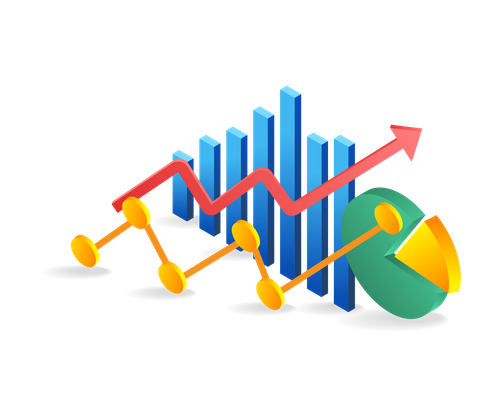

# **2 .¿Cómo están distribuidas las variables cualitativas?**
**Propósito:** Entender cómo se distribuyen las categorías dentro de las variables cualitativas y detectar posibles desequilibrios o patrones importantes en las diferentes categorías.
* **Preguntas relacionadas:**
1.	¿Cuáles son las categorías más frecuentes? ¿Existen algunas categorías que dominan sobre otras?
2.	¿Hay categorías que están infrarepresentadas o sobrepresentadas? ¿Se observan desequilibrios importantes que podrían afectar el análisis o los modelos?
* **Acciones en el EDA:**
1.	Generar tablas de frecuencia para ver cuántos registros pertenecen a cada categoría.
2.	Utilizar gráficos de barras para visualizar la distribución de las variables categóricas y detectar si hay categorías muy desequilibradas.


## **Análisis de Variables Cualitativas**
Las variables cualitativas son aquellas que contienen valores que representan grupos o categorías, y no cantidades numéricas. En general, su análisis se enfoca en entender la distribución de las categorías, su relación con otras variables y los patrones que pueden extraerse de los datos.



### **Conversión de Variables Numéricas con Pocos Valores Únicos a Categóricas Ordinales**
En este proyecto, algunas columnas numéricas como "Cant. Personas a Cargo" presentan pocos valores únicos y no se comportan como variables continuas. Por esta razón, vamos a convertirlas en variables categóricas ordinales, lo que nos permitirá analizarlas y visualizarlas correctamente, utilizando gráficos de barras y asegurando que los modelos predictivos las interpreten de manera adecuada.


In [ ]:
columnas_cat_ordinales = ['Cant. Personas a Cargo','Total Productos Bancarios','Meses Inactivos Ultimo Año','Frecuencia de Contacto al Banco']
for columna in columnas_cat_ordinales:
    df[columna] = df[columna].astype('category')

In [ ]:
# Seleccionar solo las columnas categóricas
columnas_categoricas = df.select_dtypes(include=["object","category"]).columns
print("Columnas categóricas:", columnas_categoricas)

Columnas categóricas: Index(['Estado Abandono', 'Genero', 'Cant. Personas a Cargo',
       'Nivel Educativo', 'Estado Civil', 'Rango Ingresos',
       'Categoria Tarjeta', 'Total Productos Bancarios',
       'Meses Inactivos Ultimo Año', 'Frecuencia de Contacto al Banco'],
      dtype='object')


### **Tabla de Frecuencia**
Para generar tablas de frecuencia y visualizar cuántos registros pertenecen a cada categoría en columnas categóricas, podemos utilizar la función value_counts() de pandas. Esto te permite contar la cantidad de veces que aparece cada categoría en una columna.

In [ ]:
# Generar tablas de frecuencia para cada columna categórica
valores_unicos = {}
for columna in columnas_categoricas:
    valores_unicos[columna] = df[columna].value_counts().shape[0]

pd.DataFrame(valores_unicos,index=["Valores Únicos"]).transpose()

Valores Únicos
Estado Abandono                               2
Genero                                        2
Cant. Personas a Cargo                        6
Nivel Educativo                               7
Estado Civil                                  4
Rango Ingresos                                6
Categoria Tarjeta                             4
Total Productos Bancarios                     6
Meses Inactivos Ultimo Año                    7
Frecuencia de Contacto al Banco               7

### **Distribución de las Categorías**
El primer paso en el análisis de variables categóricas es comprender la distribución de cada categoría. Esto implica identificar cuántos registros pertenecen a cada categoría y ver si hay alguna que predomine.
Gráficos de barras son útiles para visualizar la distribución de cada categoría, lo que nos permite ver si alguna categoría tiene una mayor representación en el conjunto de datos o si está distribuido de manera uniforme.

In [ ]:
# Crear un layout de subplots con 2 columnas y tantas filas como sea necesario
num_filas = (len(columnas_categoricas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2, subplot_titles=[f'Conteo de {col}' for col in columnas_categoricas])

# Añadir los gráficos de barras a cada subplot
fila = 1
columna_layout = 1

for columna in columnas_categoricas:
    # Obtener el conteo de cada categoría
    conteo = df[columna].value_counts().reset_index()
    conteo.columns = [columna, 'Conteo']

    # Crear el gráfico de barras para cada columna
    fig.add_trace(go.Bar(x=conteo[columna], y=conteo['Conteo'], text=conteo['Conteo'], textposition='auto', name=columna),
                  row=fila, col=columna_layout)

    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico
fig.update_layout(height=400*num_filas, showlegend=False, title_text="Gráficos de Barras de Variables Categóricas")

# Mostrar el gráfico
fig.show()

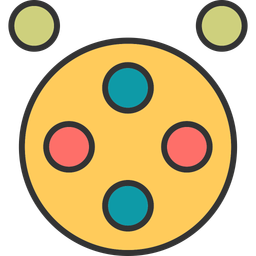

# **3. ¿Existen valores atípicos (outliers) en los datos?**
* **Propósito:** Detectar y tratar los valores que se alejan significativamente del rango normal de las variables.
*	**Preguntas relacionadas:**
1.	¿Qué variables contienen outliers? ¿Estos outliers son errores o representan eventos raros que deben conservarse?
2.	¿Cómo deberían manejarse los outliers (eliminar, reemplazar, etc.)?
*	**Acciones en el EDA:**
1.	Usar boxplots y cálculos del IQR para detectar outliers.
2.	Decidir qué hacer con los outliers según su relevancia en el contexto del análisis.


## **Detección de Valores Atípicos**
Los valores atípicos son puntos de datos que están significativamente alejados de la mayoría de los datos en una columna. Identificar estos valores es importante porque pueden influir en el análisis de manera negativa, sesgando las medidas de tendencia central como la media.

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=["int","float"]).columns
print("Columnas numéricas:", columnas_numericas)

Columnas numéricas: Index(['Edad Cliente', 'Antiguedad Cuenta', 'Limite Credito',
       'Saldo Pendiente Tarjeta', 'Promedio Credito Disponible',
       'Monto Total Transacciones', 'Numero Total Transacciones',
       'Porcentaje Uso Credito'],
      dtype='object')


**Boxplots:** Nos ayudarán a identificar valores atípicos visualmente. Los puntos fuera de los "whiskers" son los valores que se consideran atípicos.

In [ ]:
# Crear un layout de subplots con 2 columnas y tantas filas como se necesiten
num_filas = (len(columnas_numericas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2, subplot_titles=[f'Boxplot de {col}' for col in columnas_numericas])

# Añadir los boxplots a cada subplot
fila = 1
columna_layout = 1

for columna in columnas_numericas:
    # Crear el boxplot
    fig.add_trace(go.Box(y=df[columna], name=columna), row=fila, col=columna_layout)
    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico
fig.update_layout(height=400*num_filas, showlegend=False, title_text="Boxplots de Variables Numéricas")

# Mostrar el gráfico
fig.show()

## **Manejo de Outliers (Valores Atípicos)**
Los outliers (valores atípicos) son observaciones en un conjunto de datos que están notablemente alejadas de la mayoría de los otros datos. Estos valores extremos pueden afectar negativamente el análisis y los modelos predictivos si no se manejan adecuadamente. En esta sección, exploraremos diferentes maneras de detectar, visualizar y manejar outliers en tu dataset.

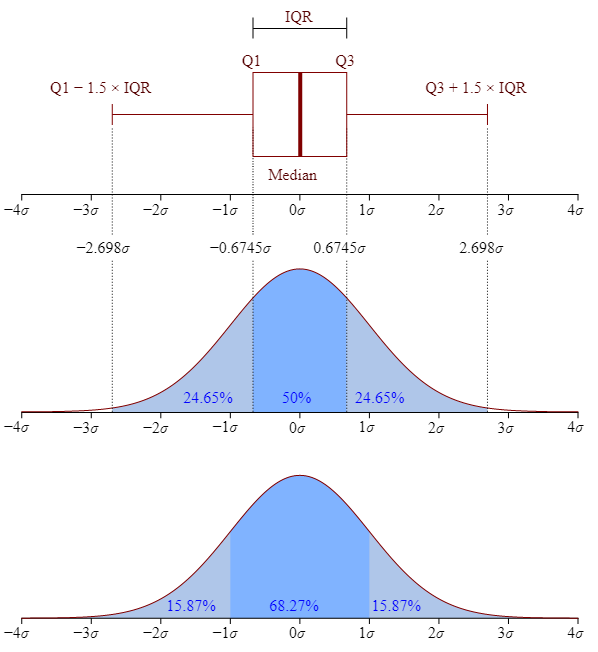

## **1. Detección de Outliers**
**a. Usando el Rango Intercuartil (IQR)**
Una técnica común para identificar outliers es el Rango Intercuartil (IQR). Los valores que se encuentran fuera de 1.5 veces el IQR por encima del tercer cuartil (Q3) o por debajo del primer cuartil (Q1) son considerados outliers.

**Fórmula:**

IQR=Q3−Q1

Límite inferior:

Q1−1.5×IQR

Límite superior:

Q3+1.5×IQR

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Iterar sobre cada columna numérica para calcular el IQR y detectar outliers
for columna in columnas_numericas:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers en la columna actual
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

    # Mostrar los outliers encontrados
    print(f"Outliers en la columna {columna}:\n", outliers[[columna]])

Outliers en la columna Edad Cliente:
        Edad Cliente
7              32.0
18             61.0
21             62.0
27             63.0
39             66.0
...             ...
10082          29.0
10097          31.0
10113          27.0
10114          29.0
10125          30.0

[663 rows x 1 columns]
Outliers en la columna Antiguedad Cuenta:
        Antiguedad Cuenta
11                    54
18                    56
27                    56
39                    56
52                    54
...                  ...
10054                 15
10062                 17
10069                 14
10107                 54
10114                 15

[386 rows x 1 columns]
Outliers en la columna Limite Credito:
        Limite Credito
6             34516.0
7             29081.0
16            30367.0
40            32426.0
45            34516.0
...               ...
10098         34516.0
10100         29808.0
10104         29663.0
10110         34516.0
10112         34516.0

[984 rows x 1 columns]
Out

## **2. Manejo de Outliers**
Una vez que hemos detectado los outliers, tenemos varias formas de manejarlos dependiendo del contexto del análisis.

**a. Eliminar Outliers**

Si los outliers son errores o no representan información relevante para el análisis, podemos eliminarlos del dataset.

zoo

In [ ]:
df_sin_outliers = df.copy()

# Contar las filas originales
filas_originales = len(df)

for columna in columnas_numericas:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna
    Q1 = df_sin_outliers[columna].quantile(0.25)
    Q3 = df_sin_outliers[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar outliers en la columna actual
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Eliminar los registros que son outliers en la columna actual
    df_sin_outliers = df_sin_outliers[((df_sin_outliers[columna] >= limite_inferior) & (df_sin_outliers[columna] <= limite_superior))]

# Contar las filas restantes después de eliminar los outliers
filas_restantes = len(df_sin_outliers)

# Calcular cuántos valores se eliminaron
valores_eliminados = filas_originales - filas_restantes

print(f"Filas originales: {filas_originales}")
print(f"Filas restantes después de eliminar outliers: {filas_restantes}")
print(f"Valores eliminados: {valores_eliminados}")


Filas originales: 10127
Filas restantes después de eliminar outliers: 7237
Valores eliminados: 2890


**b. Rellenar Outliers**

Si no quieres eliminar los outliers pero sí reducir su impacto, puedes reemplazarlos por un valor más razonable, como la media, mediana, o cualquier otro valor límite.

In [ ]:
df_reemplazado = df.copy()
# Iterar sobre cada columna numérica para calcular el IQR y reemplazar outliers
for columna in columnas_numericas:
    # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para cada columna
    Q1 = df_reemplazado[columna].quantile(0.25)
    Q3 = df_reemplazado[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para detectar outliers en la columna actual
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Reemplazar los valores fuera de los límites con los valores de los límites
    df_reemplazado[columna] = df_reemplazado[columna].apply(lambda x: limite_inferior if x < limite_inferior else (limite_superior if x > limite_superior else x))

# Ver el dataset con los outliers reemplazados
df_reemplazado.head()
df = df_reemplazado

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df_reemplazado.select_dtypes(include=['float64', 'int64']).columns

num_filas = (len(columnas_numericas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2, subplot_titles=[f'Boxplot de {col}' for col in columnas_numericas])

# Añadir los boxplots a cada subplot
fila = 1
columna_layout = 1

for columna in columnas_numericas:
    # Crear el boxplot
    fig.add_trace(go.Box(y=df_reemplazado[columna], name=columna), row=fila, col=columna_layout)
    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico
fig.update_layout(height=400*num_filas, showlegend=False, title_text="Boxplots de Variables Numéricas")

# Mostrar el gráfico
fig.show()

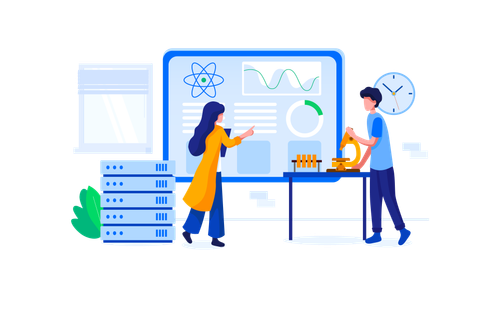

# **4. ¿Cómo se relacionan las variables entre sí?**
*	**Propósito:** Identificar correlaciones entre las variables que puedan ser útiles para el modelado y la interpretación de los datos.

*	**Preguntas relacionadas:**
1.	¿Existen correlaciones fuertes entre las variables numéricas?
2.	¿Cómo se relaciona la variable objetivo con otras variables (numéricas y categóricas)?
*	**Acciones en el EDA:**
1.	Crear una matriz de correlación y visualizarla con un heatmap para encontrar relaciones entre las variables numéricas.
2.	Usar gráficos como scatter plots para entender la relación entre variables continuas.
3.	Usar gráficos de barras apiladas para examinar la relación entre variables categóricas y la variable objetivo.

## **Matriz de correlación con Heatmap (variables numéricas)**
Para identificar correlaciones entre las variables numéricas, creamos una matriz de correlación y la visualizamos con un heatmap.

### **Correlación entre variables**
La matriz de correlación nos permite ver cómo se relacionan las diferentes variables numéricas entre sí. Una correlación alta (positiva o negativa) puede indicar una relación importante entre dos variables. La matriz de correlación se calcula usando el coeficiente de correlación de Pearson, que toma valores entre -1 y 1:

* 1 indica una correlación positiva perfecta.
* 0 indica que no hay correlación.
* -1 indica una correlación negativa perfecta.

In [ ]:
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
matriz_correlacion = df[columnas_numericas].corr().round(2)

# Crear el heatmap usando Plotly
fig = px.imshow(matriz_correlacion,
                labels=dict(x="Variables", y="Variables", color="Correlación"),
                x=matriz_correlacion.columns,
                y=matriz_correlacion.columns,
                color_continuous_scale=px.colors.sequential.Blues,
                text_auto=True)

# Personalizar el layout del heatmap
fig.update_layout(
    title="Heatmap de Correlación entre Variables Numéricas",
    height=800,
    width=1400
)

# Mostrar el heatmap
fig.show()

## **Gráficos de dispersión (scatter plots) para analizar relaciones entre variables continuas**
Usamos scatter plots para analizar las relaciones entre variables numéricas continuas.

In [ ]:
variables_continuas = df.select_dtypes(include=['float64', 'int64']).columns


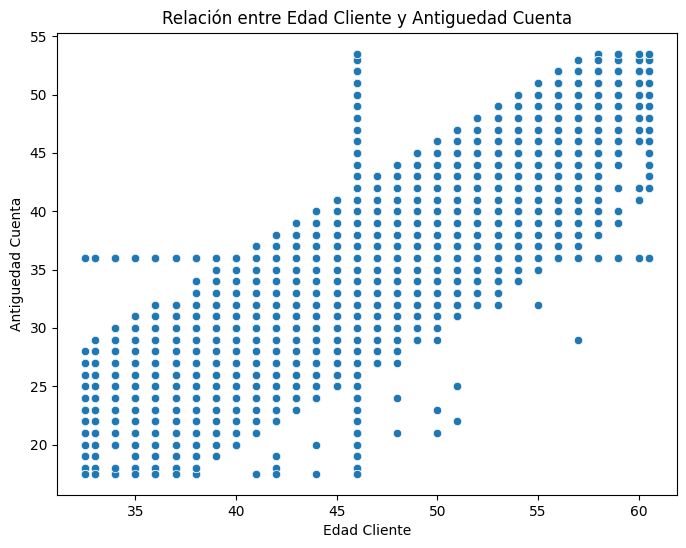

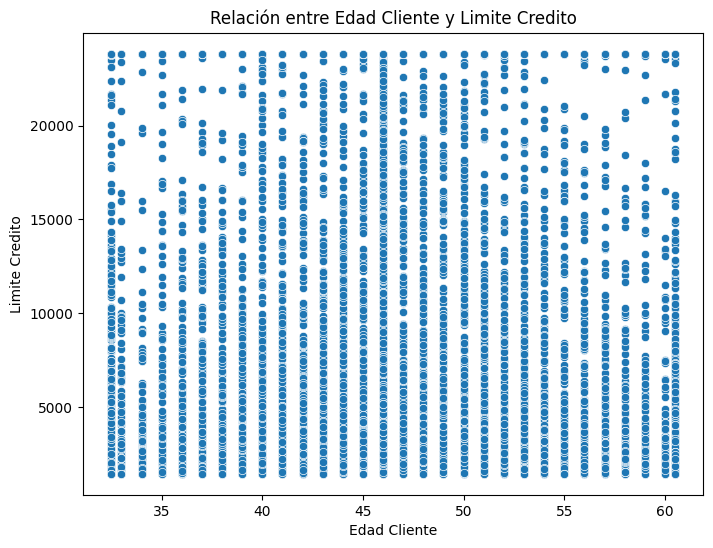

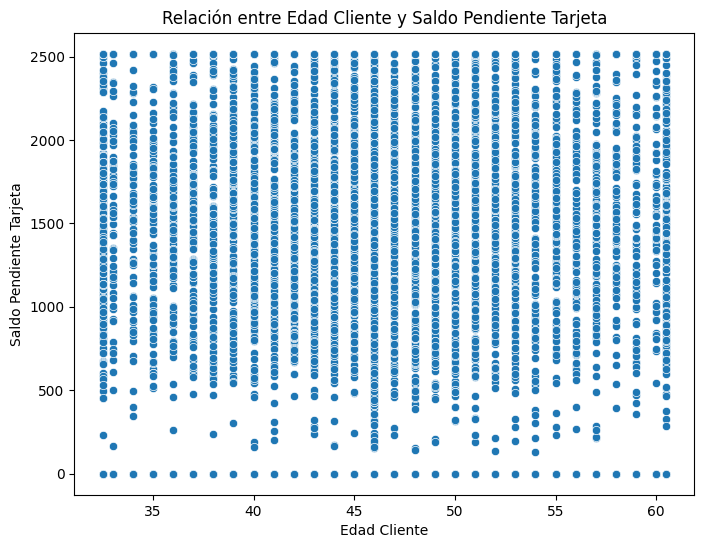

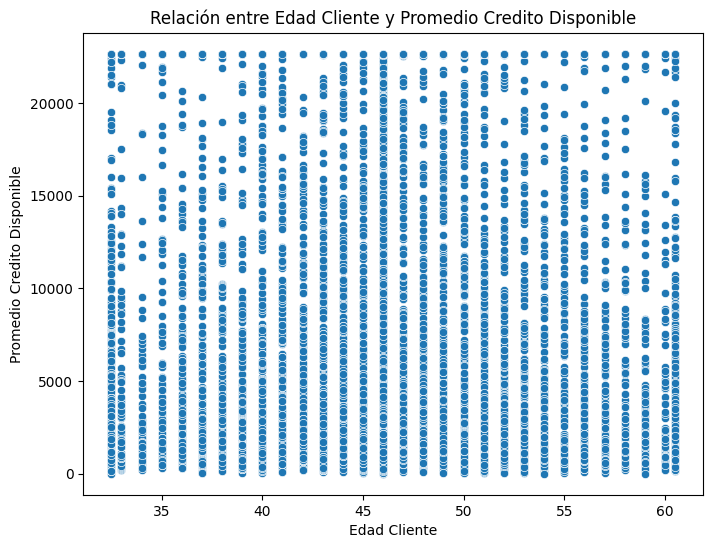

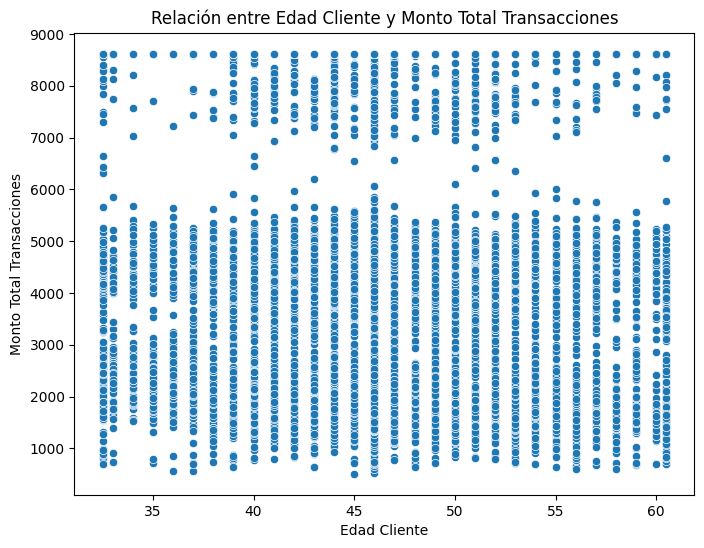

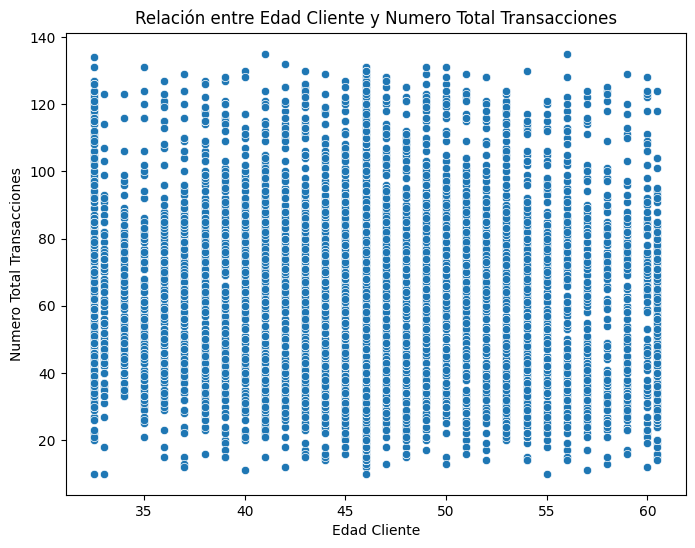

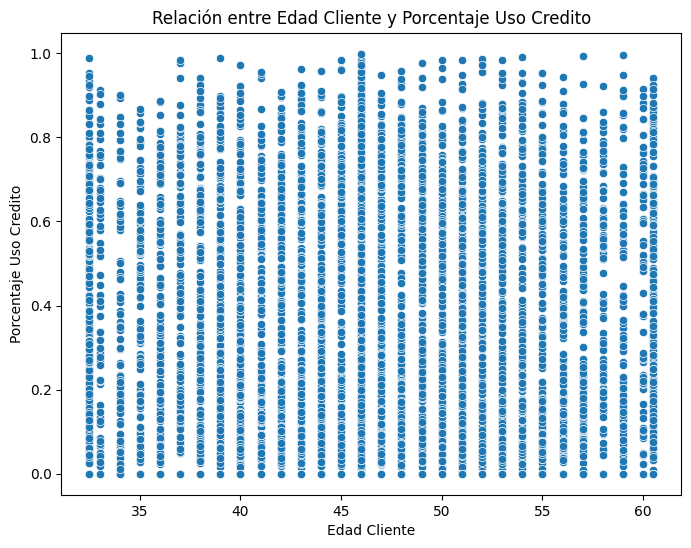

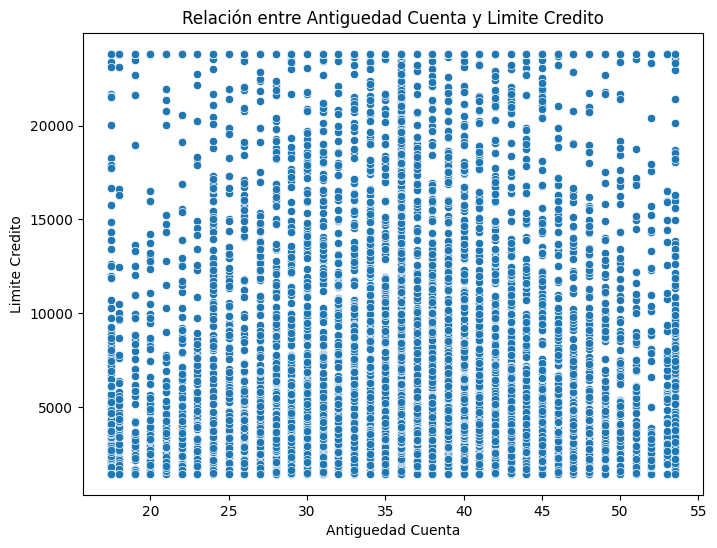

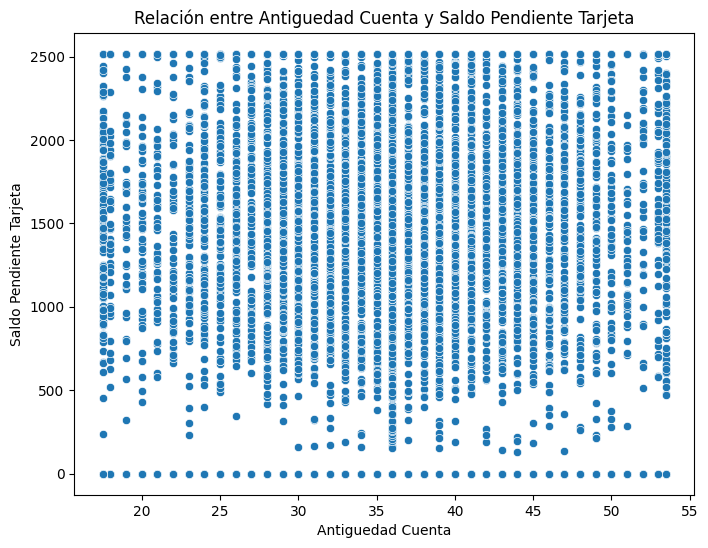

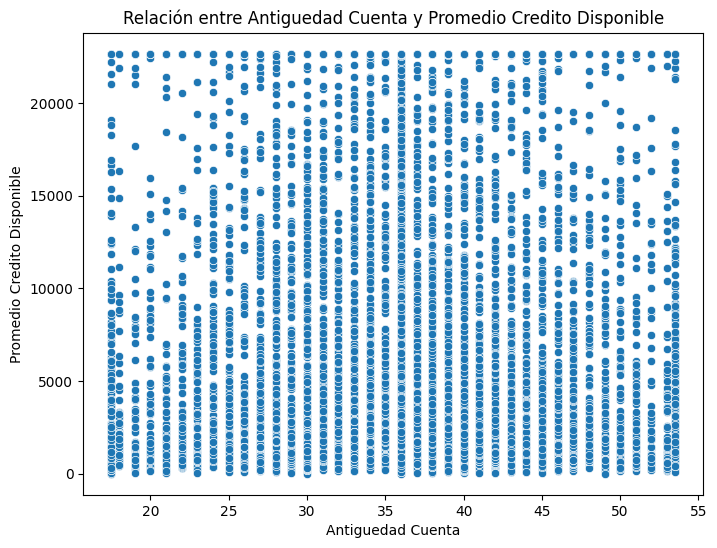

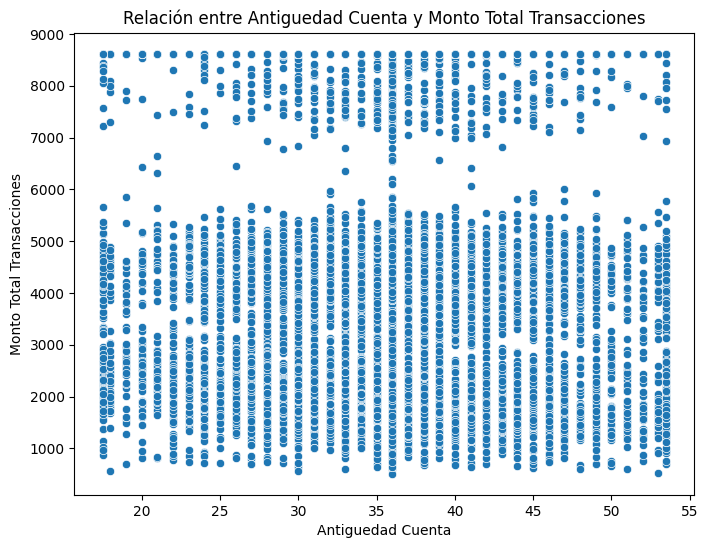

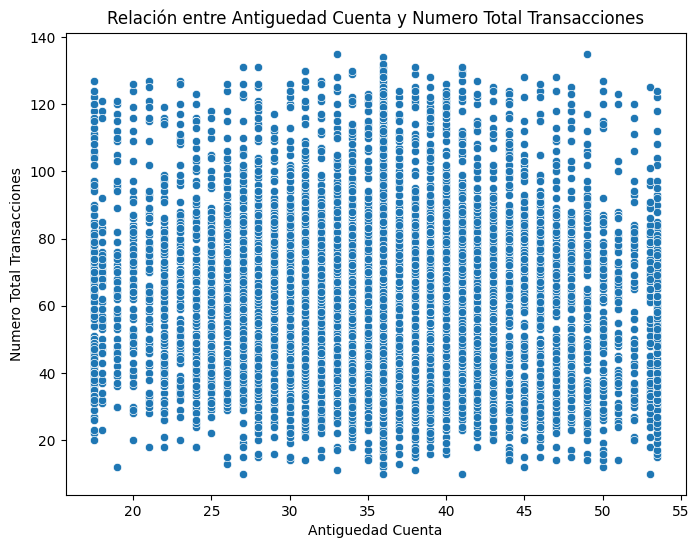

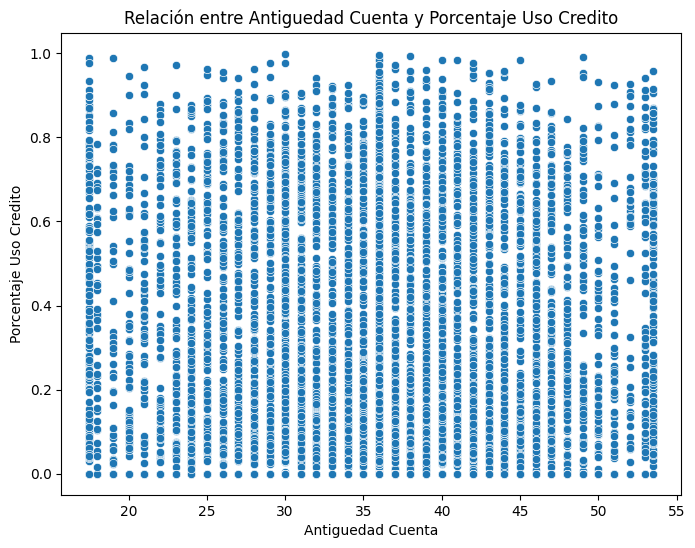

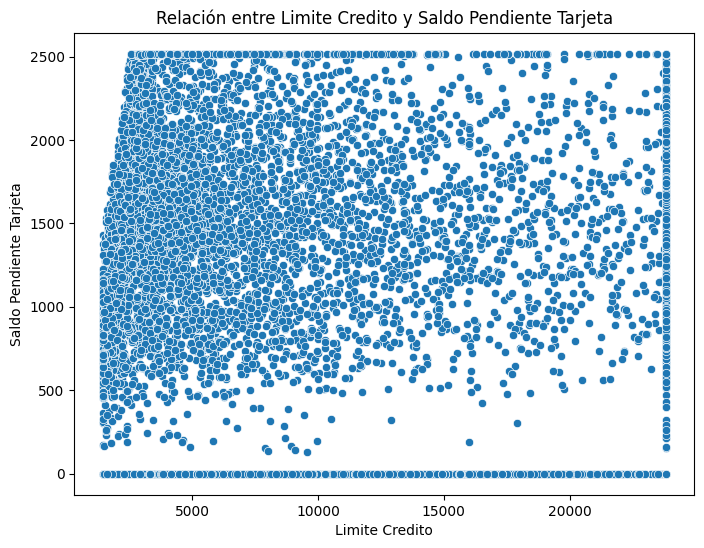

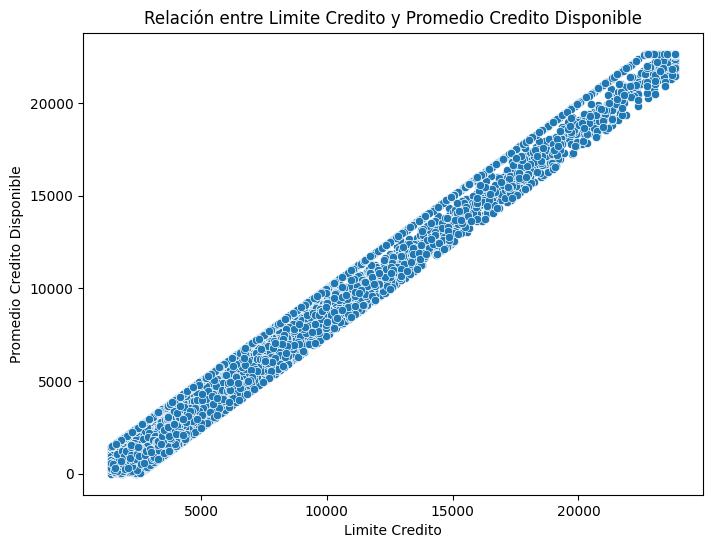

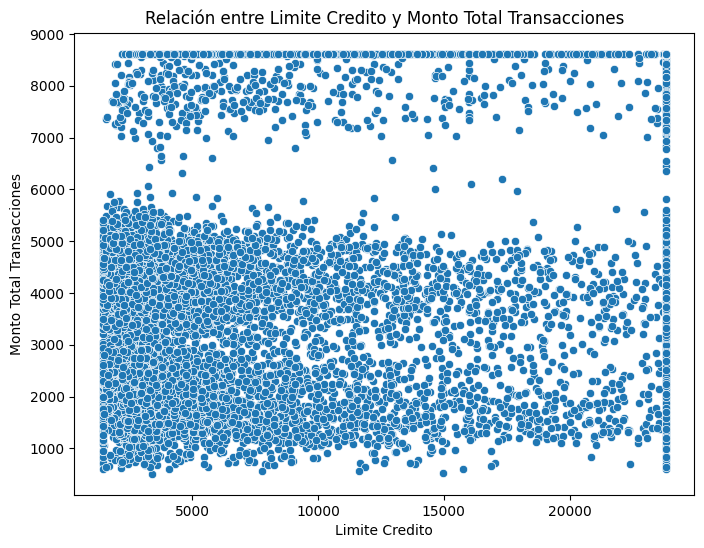

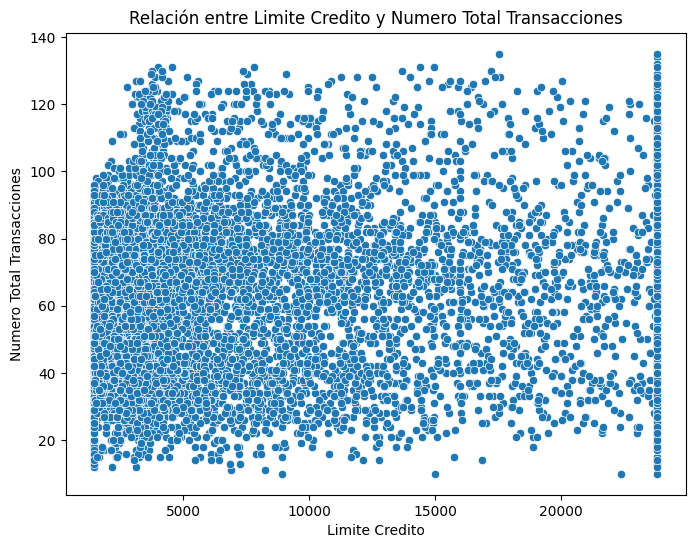

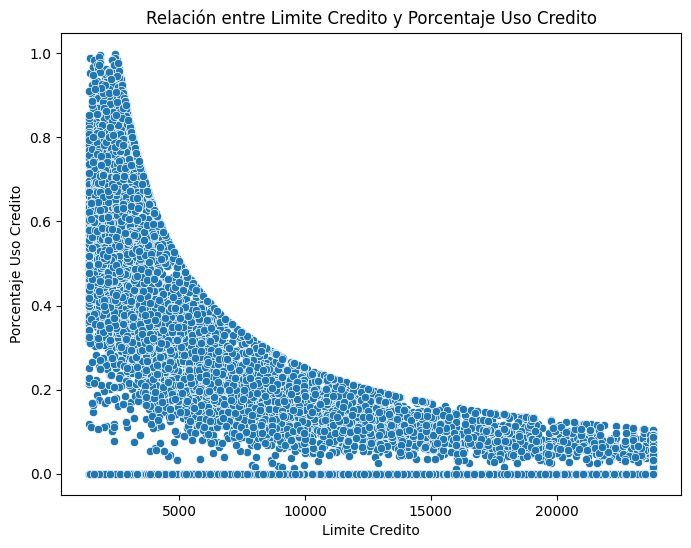

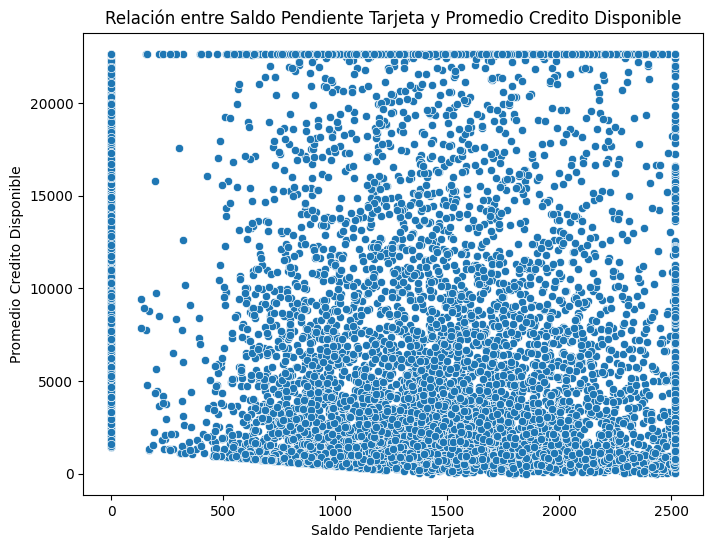

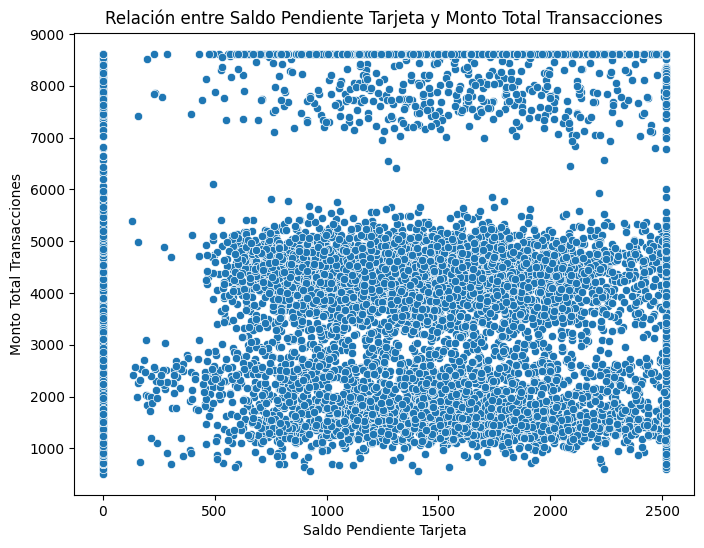

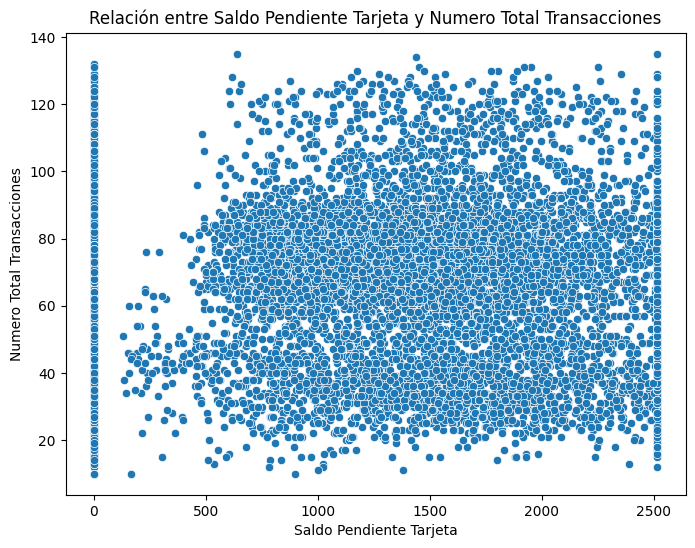

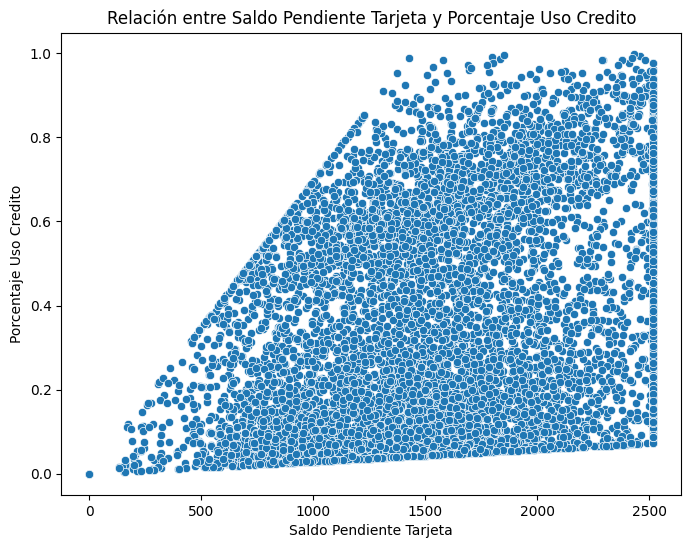

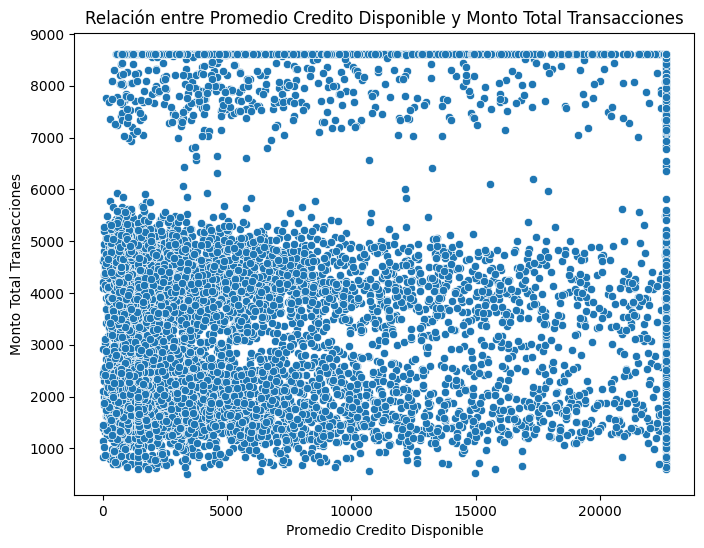

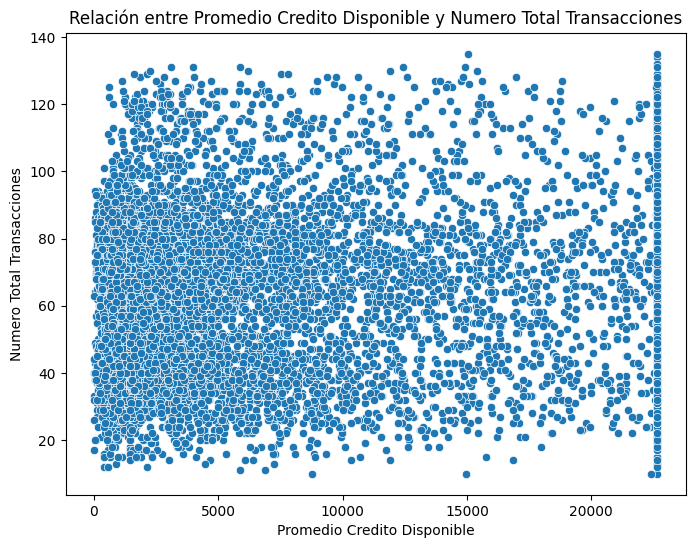

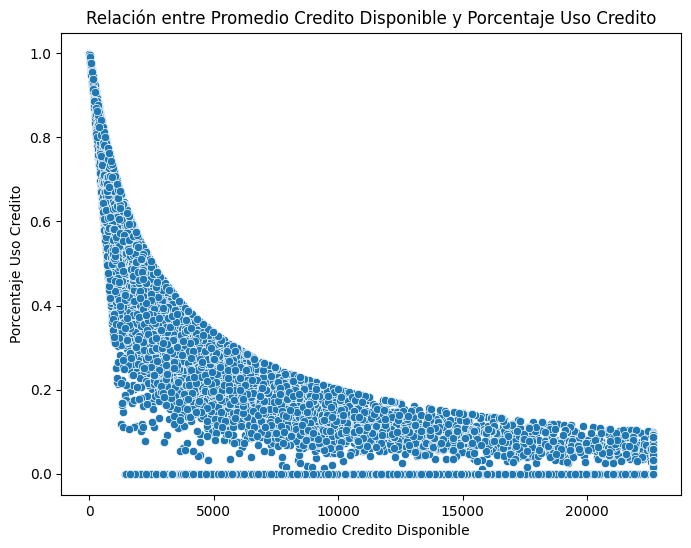

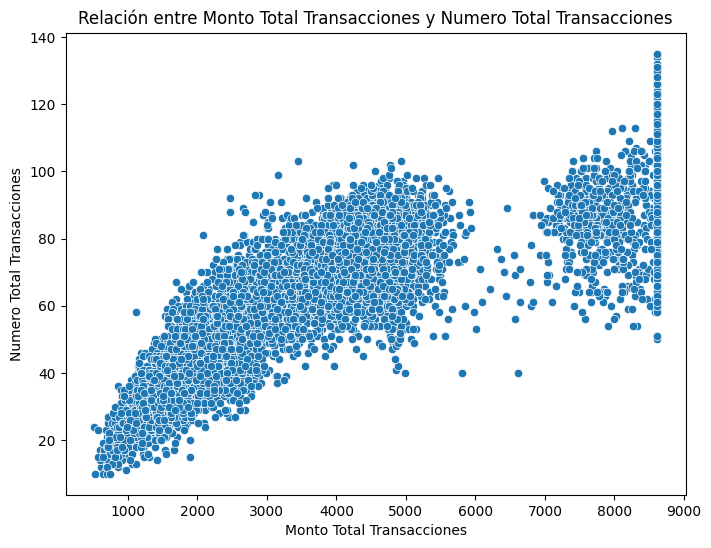

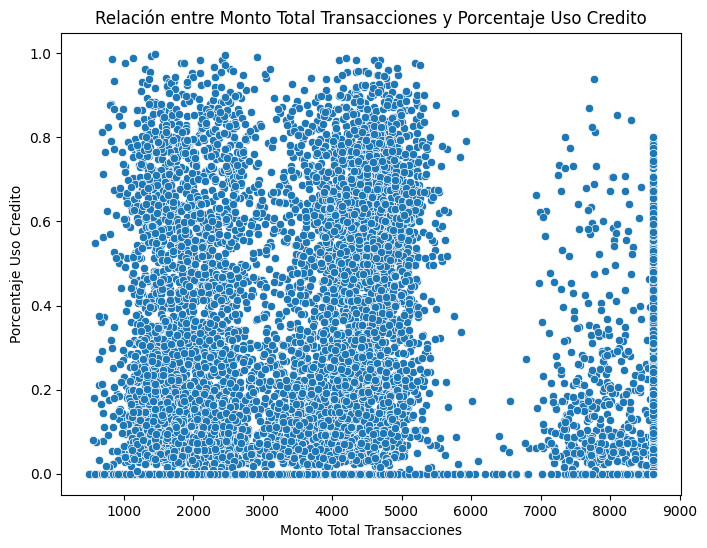

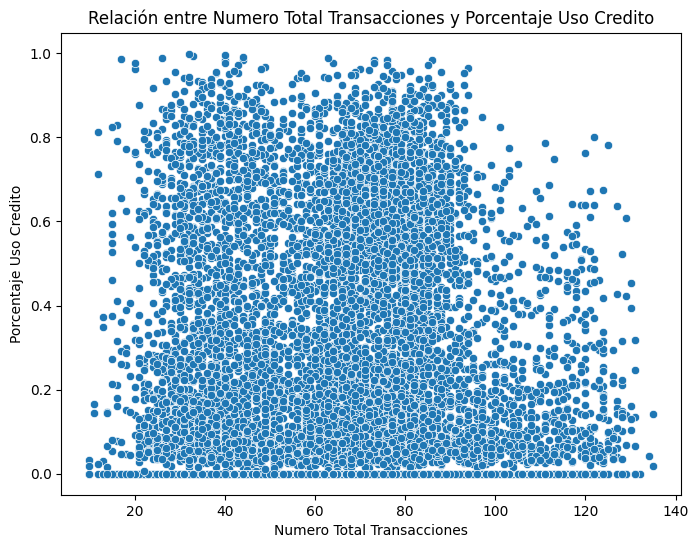

In [ ]:
for i in range(len(variables_continuas)):
    for j in range(i+1, len(variables_continuas)):
        plt.figure(figsize=(8,6))
        sns.scatterplot(x=df[variables_continuas[i]], y=df[variables_continuas[j]])
        plt.title(f'Relación entre {variables_continuas[i]} y {variables_continuas[j]}')
        plt.xlabel(variables_continuas[i])
        plt.ylabel(variables_continuas[j])
        plt.show()

## **Relación entre Variables Categóricas y Variables Objetivo**
Otro análisis importante es ver cómo las variables categóricas se relacionan con la variable objetivo. Por ejemplo, si estás tratando de predecir si un cliente abandonará el banco (Estado_Abandono), es útil analizar cómo se comportan las diferentes categorías (como Nivel_Educacion o Genero) en relación con esta variable.

Gráficos de barras agrupadas pueden ayudarnos a visualizar cómo las diferentes categorías de una variable se distribuyen entre los clientes que abandonaron o no abandonaron el banco. Esto nos proporciona información sobre posibles patrones predictivos en las variables categóricas.

In [ ]:
columnas_categoricas = df.select_dtypes(include=["object","category"]).columns
columnas_categoricas = columnas_categoricas.difference(['Estado Abandono'])

num_filas = (len(columnas_categoricas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2, subplot_titles=[f'Relación entre {col}' for col in columnas_categoricas])

# Definir una paleta de colores consistente para el estado de abandono
colores = {"Cliente Existente": "#264b75", "Cliente Perdido": "#65abe0"}

# Añadir los gráficos de barras a cada subplot
fila = 1
columna_layout = 1
show_legend = True

for columna in columnas_categoricas:
    # Agrupar los datos por la columna categórica y 'Estado Abandono'
    agrupado = df.groupby([columna, 'Estado Abandono']).size().reset_index(name='Conteo')

    # Crear el gráfico de barras para cada columna
    for estado_abandono in agrupado['Estado Abandono'].unique():
        subset = agrupado[agrupado['Estado Abandono'] == estado_abandono]
        fig.add_trace(go.Bar(x=subset[columna], y=subset['Conteo'], name=estado_abandono,
                             marker_color=colores[estado_abandono], text=subset['Conteo'], textposition='outside',
                             showlegend=show_legend),
                      row=fila, col=columna_layout)

    show_legend = False

    # Alternar entre columnas 1 y 2
    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico para mejorar la legibilidad
fig.update_layout(
    height=400*num_filas,
    title_text="Relación entre Variables Categóricas y Estado de Abandono",
    bargap=0.15,
    legend=dict(title="Estado de Abandono", orientation="h", yanchor="bottom", y=1.01, xanchor="center", x=0.5)
)

# Mostrar el gráfico
fig.show()

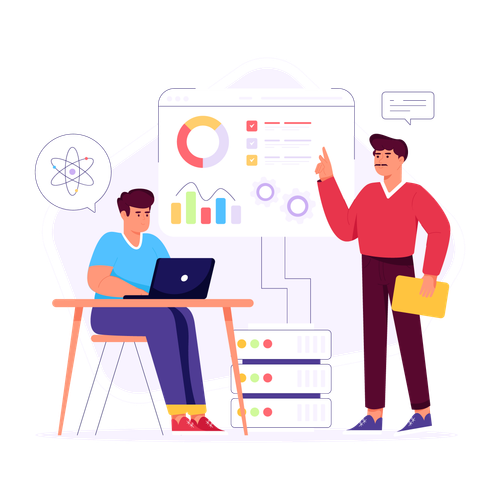

# **5. ¿Qué suposiciones podemos hacer sobre los datos?**
*	**Propósito:** Formular hipótesis basadas en el análisis de los datos que puedan ser útiles para la construcción del modelo y las decisiones futuras.
*	**Preguntas relacionadas:**
1.	¿Qué patrones o tendencias emergen de los datos? ¿Alguna variable tiene un impacto visible en la variable objetivo?
2.	¿Existen distribuciones que sugieren que algunos modelos podrían ser más apropiados que otros (por ejemplo, distribuciones normales, sesgadas, etc.)?
*	**Acciones en el EDA:**
1.	Identificar si los datos siguen una distribución específica (normal, sesgada, etc.) usando el histogramas y revisando su curtosis, asimetria y con prueba estadistica.
2.	Crear hipótesis iniciales para posibles relaciones causales o patrones en los datos.


## **Formulación de hipótesis iniciales sobre patrones o relaciones entre las variables**
Basado en el análisis de las distribuciones y la relación con la variable objetivo, podemos formular algunas hipótesis. Aquí te dejo cómo hacerlo:

* Crear gráficos de histograma y diagramas de cajas (boxplots) para ver cómo varía una variable continua en función de la variable objetivo. Esto puede ayudarnos a identificar si alguna variable tiene un impacto visible en la variable objetivo.

In [ ]:
columnas_numericas = ['Edad Cliente', 'Antiguedad Cuenta', 'Limite Credito',
                       'Saldo Pendiente Tarjeta', 'Promedio Credito Disponible',
                       'Monto Total Transacciones', 'Numero Total Transacciones',
                       'Porcentaje Uso Credito']

## **Histograma:**
Nos muestra la distribución de los datos. Si la simetría es cercana a 0, la distribución es simétrica. Si hay sesgo positivo o negativo, la forma del histograma cambiará, con más datos en un extremo que en el otro.



###**Simetría y Curtosis:**
Te ayudarán a entender si los datos están distribuidos de forma simétrica o si tienen colas más gruesas (indicando más valores atípicos).

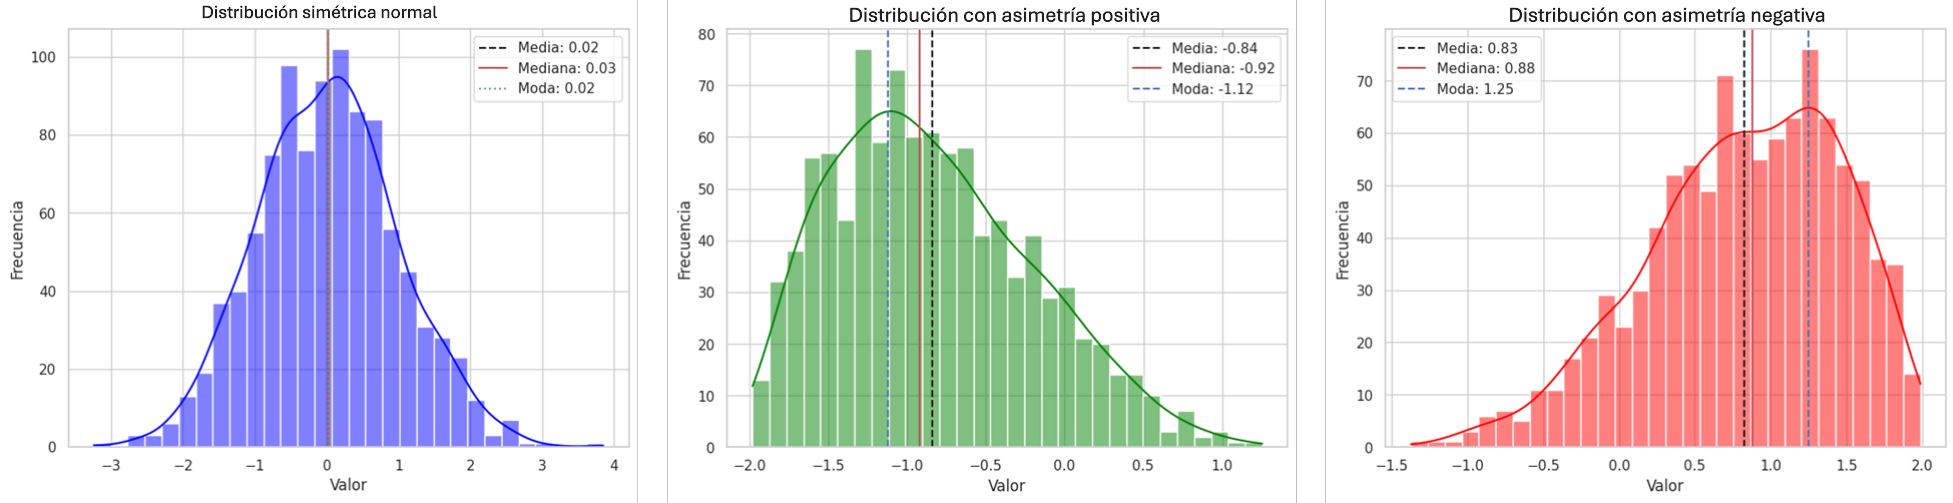

**Simetría (Skewness)**

La simetría o skewness nos indica si los datos están distribuidos de manera simétrica o si están sesgados hacia un lado (cola izquierda o derecha). En general:

* Skewness = 0: La distribución es simétrica (parecida a una distribución normal).
* Skewness > 0: La distribución tiene una cola larga hacia la derecha (sesgo positivo).
* Skewness < 0: La distribución tiene una cola larga hacia la izquierda (sesgo negativo).

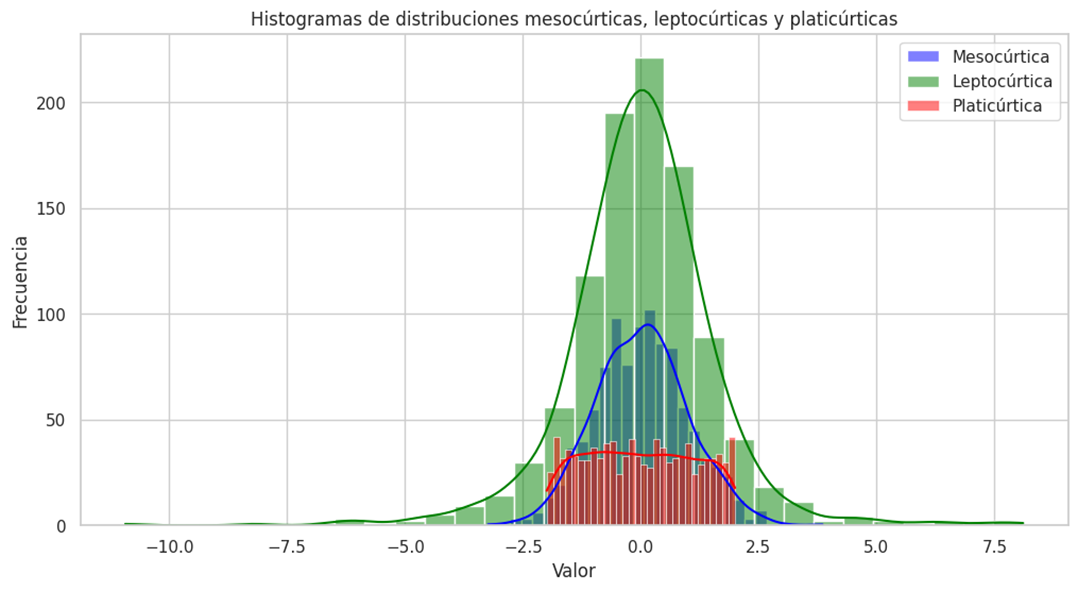

**Curtosis (Kurtosis)**

La curtosis nos dice si la distribución tiene colas más gruesas o más delgadas que una distribución normal.

* Curtosis = 0: La distribución tiene la misma cantidad de colas que una distribución normal.
* Curtosis > 0: Indica que las colas son más gruesas que las de una distribución normal (más valores extremos).
* Curtosis < 0: Indica que las colas son más delgadas, lo que significa que hay menos valores extremos que en una distribución normal.


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from plotly.subplots import make_subplots

# Variable objetivo
variable_objetivo = 'Estado Abandono'

# Calcular el número de filas necesarias para los subplots
num_filas = (len(columnas_numericas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2,
                    subplot_titles=[f'Relación entre {col} y {variable_objetivo}' for col in columnas_numericas])

# Definir una paleta de colores consistente para el estado de abandono
colores = {"Cliente Existente": "#264b75", "Cliente Perdido": "#65abe0"}

# Añadir las curvas de densidad a cada subplot con el área pintada
fila = 1
columna_layout = 1
show_legend = True

for columna in columnas_numericas:
    # Obtener los datos para cada categoría de 'Estado Abandono'
    subset_existente = df[df[variable_objetivo] == 'Cliente Existente'][columna].dropna()
    subset_perdido = df[df[variable_objetivo] == 'Cliente Perdido'][columna].dropna()

    # Crear la curva de densidad para "Cliente Existente"
    kde_existente = gaussian_kde(subset_existente)
    x_vals_existente = np.linspace(subset_existente.min(), subset_existente.max(), 100)
    y_vals_existente = kde_existente(x_vals_existente)

    # Crear la curva de densidad para "Cliente Perdido"
    kde_perdido = gaussian_kde(subset_perdido)
    x_vals_perdido = np.linspace(subset_perdido.min(), subset_perdido.max(), 100)
    y_vals_perdido = kde_perdido(x_vals_perdido)

    # Agregar la curva de densidad para "Cliente Existente" con área pintada
    colores = {"Cliente Existente": "rgba(38, 75, 117, 0.3)",  # Color azul claro con baja opacidad
           "Cliente Perdido": "rgba(100, 171, 224, 0.3)"}  # Color azul más claro

    # Agregar la curva de densidad para "Cliente Existente" con borde prominente
    colores = {
    "Cliente Existente": "rgba(38, 75, 117, 0.5)",  # Color azul oscuro con cierta opacidad
    "Cliente Perdido": "rgba(100, 171, 224, 0.5)"   # Color azul más claro
    }

    # Agregar la curva de densidad para "Cliente Existente" con borde prominente
    fig.add_trace(go.Scatter(x=x_vals_existente, y=y_vals_existente, mode='lines', name='Cliente Existente',
                            line=dict(color='rgba(38, 75, 117, 1)', width=4),  # Borde azul oscuro
                            fill='tozeroy',  # Pintar el área bajo la curva
                            fillcolor=colores['Cliente Existente'],
                            showlegend=show_legend), row=fila, col=columna_layout)

    # Agregar la curva de densidad para "Cliente Perdido" con borde diferente
    fig.add_trace(go.Scatter(x=x_vals_perdido, y=y_vals_perdido, mode='lines', name='Cliente Perdido',
                            line=dict(color='rgba(100, 171, 224, 1)', width=4),  # Borde azul más claro y punteado
                            fill='tozeroy',  # Pintar el área bajo la curva
                            fillcolor=colores['Cliente Perdido'],
                            showlegend=show_legend), row=fila, col=columna_layout)



    # Después del primer gráfico, ocultar la leyenda para los gráficos restantes
    show_legend = False

    # Alternar entre columnas 1 y 2
    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico
fig.update_layout(
    height=400 * num_filas,
    title_text="Relación entre Variables Numéricas y Estado de Abandono (Curvas de Densidad)",
    xaxis_title="Valor",
    yaxis_title="Densidad",
    boxmode='group'  # Agrupar los boxplots por categoría
)

# Mostrar el gráfico
fig.show()


### **Diagrama de Cajas (Boxplot)**

Los boxplots son herramientas gráficas que muestran la distribución de los datos a través de sus cuartiles, permitiendo identificar visualmente la mediana, los cuartiles y los valores atípicos.

* **Caja:** Representa el rango intercuartílico (IQR), que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). La línea dentro de la caja indica la mediana (Q2) de los datos.

* **Bigotes:** Se extienden desde los extremos de la caja hasta los valores que están dentro de 1.5 veces el IQR, proporcionando una visualización del rango de los datos.

* **Valores atípicos:** Los puntos que caen fuera de los bigotes se consideran valores atípicos y se representan como puntos individuales en el gráfico, lo que permite identificar casos que podrían requerir una atención especial.



In [ ]:
# Variable objetivo
variable_objetivo = 'Estado Abandono'

# Calcular el número de filas necesarias para los subplots
num_filas = (len(columnas_numericas) + 1) // 2
fig = make_subplots(rows=num_filas, cols=2, subplot_titles=[f'Relación entre {col} y {variable_objetivo}' for col in columnas_numericas])

# Definir una paleta de colores consistente para el estado de abandono
colores = {"Cliente Existente": "#264b75", "Cliente Perdido": "#65abe0"}

# Añadir los boxplots a cada subplot
fila = 1
columna_layout = 1
show_legend = True

for columna in columnas_numericas:
    # Crear el boxplot para cada categoría de 'Estado Abandono'
    for estado_abandono in df[variable_objetivo].unique():
        subset = df[df[variable_objetivo] == estado_abandono]
        fig.add_trace(go.Box(y=subset[columna], name=estado_abandono, marker_color=colores[estado_abandono],
                             boxmean=True, showlegend=show_legend, width=0.6),
                      row=fila, col=columna_layout)

    # Después del primer gráfico, ocultar la leyenda para los gráficos restantes
    show_legend = False

    # Alternar entre columnas 1 y 2
    if columna_layout == 1:
        columna_layout = 2
    else:
        columna_layout = 1
        fila += 1

# Ajustar el layout del gráfico
fig.update_layout(
    height=400*num_filas,
    title_text="Relación entre Variables Numéricas y Estado de Abandono",
    boxmode='group',  # Agrupar los boxplots por categoría
    legend=dict(title="Estado de Abandono", orientation="h", yanchor="bottom", y=1.01, xanchor="center", x=0.5)
)

# Mostrar el gráfico
fig.show()

## **Generación de hipótesis iniciales**
A medida que explores los patrones y distribuciones, puedes generar hipótesis como las siguientes:

* **Hipótesis 1:** Clientes con mayor saldo pendiente en la tarjeta tienen más probabilidades de abandonar el banco.

1. Esto podría formularse si, en los boxplots o scatter plots, se observa una diferencia significativa en el saldo pendiente entre los clientes que abandonan y los que no.
* **Hipótesis 2:** El porcentaje de uso del crédito está relacionado con la probabilidad de abandono.

1. Si el porcentaje de uso de crédito está sesgado hacia un lado, podría significar que aquellos que maximizan su límite de crédito tienen más probabilidades de abandonar.
* **Hipótesis 3:** Clientes con una mayor antigüedad en el banco tienen menos probabilidades de abandonarlo.

1. Si la Antigüedad Cuenta tiene una distribución diferente entre clientes que permanecen y los que abandonan, podrías formular esta hipótesis.

### **Hipótesis 1:** Clientes con mayor saldo pendiente en la tarjeta tienen más probabilidades de abandonar el banco

* **Hipótesis Nula (H₀):** No existe diferencia significativa en el saldo pendiente de la tarjeta entre los clientes que abandonan el banco y los que no.
* **Hipótesis Alternativa (H₁):** Existe una diferencia significativa en el saldo pendiente de la tarjeta entre los clientes que abandonan el banco y los que no.

* **Análisis visual:**
1. **Boxplot:** Comparar el Saldo Pendiente Tarjeta entre clientes que abandonaron y los que no.
2. **Scatter plot:** Visualizar la relación entre Saldo Pendiente Tarjeta y Estado de Abandono.
* **Prueba estadística:**
1. **Mann-Whitney U test:** Esta prueba no paramétrica se usará para evaluar si las diferencias observadas son significativas.

In [ ]:
fig_box1 = px.box(df, x='Estado Abandono', y='Saldo Pendiente Tarjeta',
                  title='Comparación de Saldo Pendiente Tarjeta por Estado de Abandono',
                  labels={'Estado Abandono': 'Estado de Abandono', 'Saldo Pendiente Tarjeta': 'Saldo Pendiente Tarjeta'})
fig_box1.show()

In [ ]:
# Hipótesis 1: Análisis visual - Scatter plot
fig_scatter1 = px.scatter(df, x='Saldo Pendiente Tarjeta', y='Edad Cliente', color='Estado Abandono',
                          title='Scatter plot de Saldo Pendiente Tarjeta y Edad Cliente por Estado de Abandono',
                          labels={'Saldo Pendiente Tarjeta': 'Saldo Pendiente Tarjeta', 'Edad Cliente': 'Edad Cliente'})
fig_scatter1.show()

In [ ]:
# Hipótesis 1: Prueba estadística - Mann-Whitney U test
grupo_existente = df[df['Estado Abandono'] == 'Cliente Existente']['Saldo Pendiente Tarjeta']
grupo_perdido = df[df['Estado Abandono'] == 'Cliente Perdido']['Saldo Pendiente Tarjeta']

# Aplicar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(grupo_existente, grupo_perdido)

print(f"Resultado de la prueba Mann-Whitney U para Saldo Pendiente: estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print(f"""Con un p-valor de {p_value:.5f}, podemos rechazar la hipótesis nula (H₀).
Esto significa que existe una diferencia significativa en el saldo pendiente de la tarjeta entre los clientes que abandonan y los que permanecen.
Por lo tanto, podemos inferir que el saldo pendiente tiene un impacto en la probabilidad de abandono, respaldando nuestra hipótesis alternativa.""")
else:
    print(f"""Con un p-valor de {p_value:.5f}, no podemos rechazar la hipótesis nula (H₀).
Esto indica que no existe suficiente evidencia para afirmar que el saldo pendiente sea significativamente diferente entre los clientes que abandonan y los que no.
Por lo tanto, el saldo pendiente no muestra un impacto claro en la probabilidad de abandono, y nuestra hipótesis no está respaldada.""")


Resultado de la prueba Mann-Whitney U para Saldo Pendiente: estadístico = 9510716.0, p-valor = 1.9156786730316762e-129
Con un p-valor de 0.00000, podemos rechazar la hipótesis nula (H₀). 
Esto significa que existe una diferencia significativa en el saldo pendiente de la tarjeta entre los clientes que abandonan y los que permanecen. 
Por lo tanto, podemos inferir que el saldo pendiente tiene un impacto en la probabilidad de abandono, respaldando nuestra hipótesis alternativa.


### **Hipótesis 2:** El porcentaje de uso del crédito está relacionado con la probabilidad de abandono
* **Hipótesis Nula (H₀):** No existe diferencia significativa en el porcentaje de uso del crédito entre los clientes que abandonan el banco y los que no.
* **Hipótesis Alternativa (H₁):** Existe una diferencia significativa en el porcentaje de uso del crédito entre los clientes que abandonan el banco y los que no.
* **Análisis visual:**
1. **Boxplot:** Comparar el Porcentaje Uso Credito entre clientes que abandonaron y los que no.
2. **Scatter plot:** Visualizar la relación entre Porcentaje Uso Credito y Estado de Abandono.
* **Prueba estadística:**
1. **Mann-Whitney U test:** Evaluaremos si existe una diferencia significativa en el uso del crédito entre los dos grupos.

In [ ]:
# Hipótesis 2: Análisis visual - Boxplot
fig_box2 = px.box(df, x='Estado Abandono', y='Porcentaje Uso Credito',
                  title='Comparación del Porcentaje de Uso de Crédito por Estado de Abandono',
                  labels={'Estado Abandono': 'Estado de Abandono', 'Porcentaje Uso Credito': 'Porcentaje Uso Credito'})
fig_box2.show()

In [ ]:
# Hipótesis 2: Análisis visual - Scatter plot
fig_scatter2 = px.scatter(df, x='Porcentaje Uso Credito', y='Edad Cliente', color='Estado Abandono',
                          title='Scatter plot de Porcentaje Uso Credito y Edad Cliente por Estado de Abandono',
                          labels={'Porcentaje Uso Credito': 'Porcentaje Uso Credito', 'Edad Cliente': 'Edad Cliente'})
fig_scatter2.show()

In [ ]:
# Hipótesis 2: Prueba estadística - Mann-Whitney U test
grupo_existente = df[df['Estado Abandono'] == 'Cliente Existente']['Porcentaje Uso Credito']
grupo_perdido = df[df['Estado Abandono'] == 'Cliente Perdido']['Porcentaje Uso Credito']

# Aplicar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(grupo_existente, grupo_perdido)

print(f"Resultado de la prueba Mann-Whitney U para Porcentaje de Uso de Crédito: estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print(f"""Con un p-valor de {p_value:.5f}, podemos rechazar la hipótesis nula (H₀).
Esto significa que hay una diferencia significativa en el porcentaje de uso del crédito entre los clientes que abandonan y los que permanecen.
Por lo tanto, podemos suponer que un mayor uso del crédito está relacionado con una mayor probabilidad de abandono, respaldando nuestra hipótesis.""")
else:
    print(f"""Con un p-valor de {p_value:.5f}, no podemos rechazar la hipótesis nula (H₀).
Esto indica que no hay suficiente evidencia para afirmar que el porcentaje de uso del crédito sea diferente entre los clientes que abandonan y los que no.
Por lo tanto, el uso del crédito no parece tener un impacto claro en la probabilidad de abandono.""")

Resultado de la prueba Mann-Whitney U para Porcentaje de Uso de Crédito: estadístico = 9509093.5, p-valor = 2.869097017266704e-129
Con un p-valor de 0.00000, podemos rechazar la hipótesis nula (H₀). 
Esto significa que hay una diferencia significativa en el porcentaje de uso del crédito entre los clientes que abandonan y los que permanecen. 
Por lo tanto, podemos suponer que un mayor uso del crédito está relacionado con una mayor probabilidad de abandono, respaldando nuestra hipótesis.


### **Hipótesis 3:** Clientes con una mayor antigüedad en el banco tienen menos probabilidades de abandonarlo
* **Hipótesis Nula (H₀):** No existe diferencia significativa en la antigüedad de cuenta entre los clientes que abandonan el banco y los que no.
* **Hipótesis Alternativa (H₁):** Existe una diferencia significativa en la antigüedad de cuenta entre los clientes que abandonan el banco y los que no.
* **Análisis visual:**
1. **Boxplot:** Comparar la Antigüedad Cuenta entre clientes que abandonaron y los que no.
2. **Scatter plot:** Visualizar la relación entre Antigüedad Cuenta y Estado de Abandono.
* **Prueba estadística:**
1. **Mann-Whitney U test:** Evaluaremos si existe una diferencia significativa en la antigüedad de cuenta entre los dos grupos.

In [ ]:
# Hipótesis 3: Análisis visual - Boxplot
fig_box3 = px.box(df, x='Estado Abandono', y='Antiguedad Cuenta',
                  title='Comparación de Antigüedad de Cuenta por Estado de Abandono',
                  labels={'Estado Abandono': 'Estado de Abandono', 'Antiguedad Cuenta': 'Antigüedad Cuenta'})
fig_box3.show()

In [ ]:
# Hipótesis 3: Análisis visual - Scatter plot
fig_scatter3 = px.scatter(df, x='Antiguedad Cuenta', y='Edad Cliente', color='Estado Abandono',
                          title='Scatter plot de Antigüedad de Cuenta y Edad Cliente por Estado de Abandono',
                          labels={'Antiguedad Cuenta': 'Antigüedad Cuenta', 'Edad Cliente': 'Edad Cliente'})
fig_scatter3.show()

In [ ]:
# Hipótesis 3: Prueba estadística - Mann-Whitney U test
grupo_existente = df[df['Estado Abandono'] == 'Cliente Existente']['Antiguedad Cuenta']
grupo_perdido = df[df['Estado Abandono'] == 'Cliente Perdido']['Antiguedad Cuenta']

# Aplicar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(grupo_existente, grupo_perdido)

print(f"Resultado de la prueba Mann-Whitney U para Antigüedad de Cuenta: estadístico = {stat}, p-valor = {p_value}")
if p_value < 0.05:
    print(f"""Con un p-valor de {p_value:.5f}, podemos rechazar la hipótesis nula (H₀).
Esto significa que hay una diferencia significativa en la antigüedad de cuenta entre los clientes que abandonan y los que permanecen.
Por lo tanto, podemos inferir que los clientes con más antigüedad tienen menos probabilidades de abandonar el banco, respaldando nuestra hipótesis.""")
else:
    print(f"""Con un p-valor de {p_value:.5f}, no podemos rechazar la hipótesis nula (H₀).
Esto indica que no existe suficiente evidencia para afirmar que la antigüedad de cuenta sea diferente entre los clientes que abandonan y los que no.
Por lo tanto, la antigüedad de cuenta no parece tener un impacto significativo en la probabilidad de abandono.""")

Resultado de la prueba Mann-Whitney U para Antigüedad de Cuenta: estadístico = 6750006.5, p-valor = 0.12444928775464882
Con un p-valor de 0.12445, no podemos rechazar la hipótesis nula (H₀). 
Esto indica que no existe suficiente evidencia para afirmar que la antigüedad de cuenta sea diferente entre los clientes que abandonan y los que no. 
Por lo tanto, la antigüedad de cuenta no parece tener un impacto significativo en la probabilidad de abandono.


# **Muchas Gracias y Nos Vemos la Próxima Clase**